# Name: Venigalla Venkata Manoj

AS Mentioned in the  we have the following features in our dataset regarding the NYC trip
| Column Name         | Description |
|---------------------|-------------|
| `id`                | A unique identifier for each trip |
| `vendor_id`         | A code indicating the provider associated with the trip record |
| `pickup_datetime`   | Date and time when the meter was engaged |
| `dropoff_datetime`  | Date and time when the meter was disengaged |
| `passenger_count`   | The number of passengers in the vehicle (driver entered value) |
| `pickup_longitude`  | The longitude where the meter was engaged |
| `pickup_latitude`   | The latitude where the meter was engaged |
| `dropoff_longitude` | The longitude where the meter was disengaged |
| `dropoff_latitude`  | The latitude where the meter was disengaged |
| `store_and_fwd_flag`| Indicates if the trip record was stored in the vehicle before being sent to the vendor (Y = yes, N = no) |
| `trip_duration`     |  **Target** — Duration of the trip in seconds |


I have mentioned the markdown for each and every insight i have taken from the dataset.

In [1]:
# ! pip install plotly
# ! pip install geopy
# ! pip install folium
# ! pip install haversine

### Data Understanding

###  Summary:

- Loaded the dataset and displayed its structure as well as its distribution for better understanding using `.info()`,`.head()`,`.describe()`
- Identified shape of dataset
- Explored column names and data types
- Checked for null values in the dataset (There are no null values in this dataset upon checking)
- Examined unique value counts and distributions for categorical features
- Plotted histograms to assess distributions of numerical variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot
# importing necessary libraries required

In [3]:
nyc_df=pd.read_csv("nyc_taxi_trip_duration.csv") # Loading the dataset using pandas library 
nyc_df.head() # head() function returns the top 5 records 


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
nyc_df.shape #Indicates the the number of rows and columns in our dataset 

(729322, 11)

The above shape() states that we have 7,29,322 datapoints(rows) with 11 features(columns) in our dataset

In [5]:
nyc_df.tail() # returns the last 5 records of the dataset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
nyc_df.info() # Shows us the number of not null count along with data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


From the above command we can clearly observe there no null values available in the dataset and data types of each and every row
1) But the pickup_datetime and dropoff_datetime are the type of object which should be handled further steps because they are date should be changed.

In [7]:
nyc_df.dtypes # The datatypes of each column in our dataset

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

- We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
- vendor_id, passenger_count, and trip_duration are of type int.
- pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

In [8]:
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
nyc_df.describe() # This function provide's us the several features of the data for deeper understanding of our dataset

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


From the above Observations from Numerical Summary

1. **Row Count**:
   - The dataset contains **729,322** valid entries across all numerical columns.

2. **Vendor ID**:
   - Only Two vendors exist values: 1 and 2.
   - Almost evenly distributed mean ≈ 1.53.

3. **Passenger Count**:
   - Mean: 1.66, most common values around 1-2 passengers.
   - Min = 0, which is invalid because a trip must have at least 1 passenger.
   - Max = 9, which is good a car can have 9 passengers as per real world scenerios there are 9-10 seater cars.

4.**pickup_longitud**:
   - Here pickup_longitude and pickup_latitude mean is (-73.973,40.750) which is same as dropoff_longitude and dropoff_latitude (-73.973,40,751) indicating **The dataset primarily contains short-distance trips**.
   
4. **Trip Duration**:
   - Mean trip duration: 952 seconds (15.8 minutes).
   - Standard deviation is very high (3864.6 sec) indicating large variation.
   - Min = 1 sec, Max = 1,939,736 sec (22 days) — likely due to data entry errors because they were entered in seconds so they might be entry mistake.
   - Median (50%): 663 seconds (11 minutes).






In [10]:
nyc_df.isnull().sum() # finding the null values identified no null values in the entire dataset

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [11]:
nyc_df.nunique() #This is a pandas method that counts distinct values per column.

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

- From the above code we can clearly observe there are 7,29,322 unique ids 
- Only 2 different vendors 
- 9 different passenger counts
- There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

In [12]:
print(nyc_df['store_and_fwd_flag'].value_counts()) # Counts the occurances of each type in a column


store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64


From above result we can depict that almost most of the trips are not stored in the vehicle because they dont have connection to the server

In [13]:
print("Number of 0 passengers:", (nyc_df['passenger_count'] == 0).sum())

Number of 0 passengers: 33


The above code informs us there are trips with 0 passengers depicting it might be cancelled trips as this informs us with no meaning in the dataset 

In [14]:
print("Number of trips with less than 5 seconds: ",(nyc_df['trip_duration']<=10).sum()) 
# summation of all trips with less than 5 seconds

Number of trips with less than 5 seconds:  1081


In [15]:
# Remove rows where passenger_count is 0
nyc_df = nyc_df[nyc_df['passenger_count'] != 0]

# Reset index after filtering
nyc_df.reset_index(drop=True, inplace=True)  # clearly dropping the rows with 0 passengers.


In [16]:
nyc_df.shape

(729289, 11)

Mode of trip durations (in minutes) under 60 min: 5.8
Total trips under 60 minutes: 723222


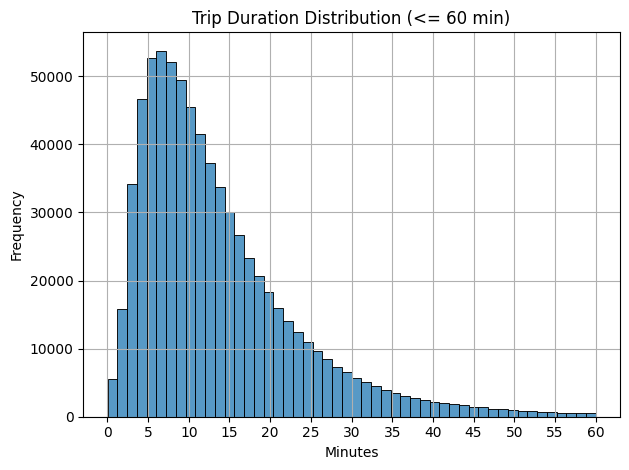

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mode of trip durations (in minutes) for trips under 60 min
mode_minutes = (nyc_df[nyc_df['trip_duration'] < 3600]['trip_duration'] / 60).mode()[0]
print("Mode of trip durations (in minutes) under 60 min:", mode_minutes)

# Total number of trips under 60 minutes
print("Total trips under 60 minutes:", (nyc_df['trip_duration'] < 3600).sum())

# Plot histogram of trip durations <= 60 min
sns.histplot((nyc_df[nyc_df['trip_duration'] <= 3600]['trip_duration']) / 60, bins=50)
plt.title("Trip Duration Distribution (<= 60 min)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.xticks(ticks=range(0, 61, 5))  # X-axis ticks from 0 to 60 mins
plt.grid(True)
plt.tight_layout()
plt.show()


**The final inferneces from the Data Understanding section is**:
- We clearly found out the shape of the dataset
- We indentified the number of columns in the dataset
- we identified 2 vendors are handling thie business of taxi 
- Most important inference about the target variable is the journey locations are nearby not too far away with avg duration of 15.8 minutes
- There are no null values in our data.
- There are trips with 0 passengers which might be cancelled trips.
- There are trips with less than 5 seconds indicating very shorter distances as we have also seen the avg pickup and drop off point are very close which makes our understanding much stronger with proofs.

###  Data Cleaning

### Summary:
  -  Deleting rows with trip duration less than 3 seconds which makes no sense 
  -  identified same drop off and pickup location might be a cancelled trip or a round trip in the dataset
  -  Checked for duplicate columns but there are no duplicate columns present.
  -  The duration of the trips in our dataset is positively skewed depicting outliers in our target variable feature
  -  We confimed the presence of outliers in our target variable using box plot and caluculated lower,q1,q2,q3,upper and deleted the datapoints above and below the upper and lower boundary respectively.
  -  As part of data cleaning I identified a column with date and time together so seleperated them and created new columns. For both pickup_datetime and dropoff_datetime columns
 

In [18]:
nyc_df[(nyc_df['trip_duration'] <=5) & (nyc_df['passenger_count'] > 0)]
# The and condition retrives the rows only if both the conditions are true

#From the above outcome we can clearly see 275 rows with less 
# than 3 seconds journey  which makes no sense out of it


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
3169,id1620472,1,2016-02-18 03:22:38,2016-02-18 03:22:40,1,-73.957687,40.718021,-73.957687,40.718025,N,2
4539,id1489763,1,2016-01-07 20:12:55,2016-01-07 20:12:58,1,-73.944984,40.802914,-73.944992,40.802937,N,3
9196,id1951797,2,2016-01-14 13:06:14,2016-01-14 13:06:19,1,-73.998833,40.732346,-73.998871,40.732307,N,5
12430,id1300247,2,2016-04-01 22:03:51,2016-04-01 22:03:54,1,-73.998657,40.757690,-73.997971,40.757359,N,3
15110,id1431396,1,2016-01-04 13:52:43,2016-01-04 13:52:47,1,-73.971779,40.761662,-73.971825,40.761600,N,4
...,...,...,...,...,...,...,...,...,...,...,...
718032,id0676372,1,2016-05-12 04:33:18,2016-05-12 04:33:23,1,-73.945229,40.751625,-73.945229,40.751625,Y,5
718068,id0304139,2,2016-05-02 00:09:04,2016-05-02 00:09:07,5,-74.015419,40.709522,-74.015427,40.709526,N,3
718886,id1228184,2,2016-04-06 19:04:46,2016-04-06 19:04:49,1,-73.994934,40.739983,-73.994797,40.739979,N,3
722648,id1515242,2,2016-05-28 05:23:37,2016-05-28 05:23:41,1,-73.915604,40.883629,-73.915604,40.883629,N,4


In [19]:
# Keep only rows with trip_duration >= 5 seconds
nyc_df = nyc_df[nyc_df['trip_duration'] >= 5]

# reset index for cleanliness
nyc_df.reset_index(drop=True, inplace=True)


In [20]:
nyc_df.shape # the shape of dataset after applying changes

(728878, 11)

In [21]:
duplicates = nyc_df[nyc_df.duplicated(keep=False)]
duplicates

# Above code indicates us No duplicate values in our dataset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


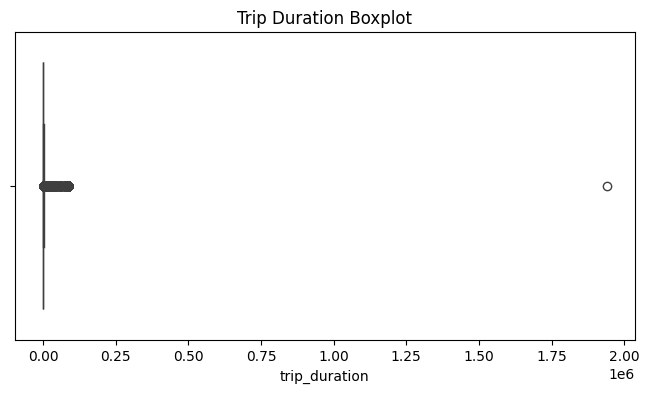

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=nyc_df['trip_duration']) # drawing boxplot for trip duration using seaborn library
plt.title("Trip Duration Boxplot")
plt.show()

#  We can clearly see that box plot  majority of trip durations are small, probably within a few thousand seconds.
# Outliers are heavily skewing the distribution.

In [23]:
def count_outliers_trip_duration(df):
    col = 'trip_duration'
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 # caluculating the inter quartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)] 
    # The outliers are those which are below lower bound and higher than higher bound
    return lower_bound, upper_bound, outliers.shape[0], outliers

lower, upper, count, outlier_rows = count_outliers_trip_duration(nyc_df) 
# we passed the parameter our dataframe to the python function for outlier caluculation

print(f"Lower bound for outliers: {lower}")
print(f"Upper bound for outliers: {upper}")
print(f"Number of outliers in trip_duration: {count}")


Lower bound for outliers: -621.5
Upper bound for outliers: 2094.5
Number of outliers in trip_duration: 36856


The above code indicates us the caluculation of boxplot which include's IQR range,Lower bound,upper_bound any datapoints(rows) which are below lower bound or above upper bound and termed as outliers. so we have 36,755 such datapoints which is effecting our data quality.

In [24]:
nyc_df.shape

(728878, 11)

In [25]:
nyc_df.drop(index=nyc_df[(nyc_df['trip_duration'] < lower) | (nyc_df['trip_duration'] > upper)].index, inplace=True)

# Dropping those outliers using the or function
#  because we need to drop all those datapoints below lower bound or greater than higher bound

In [26]:
nyc_df.shape

#The output Clearly says we have removed the outliers as 36,755 nearly 4.5% of the dataset so we can removed them 

(692022, 11)

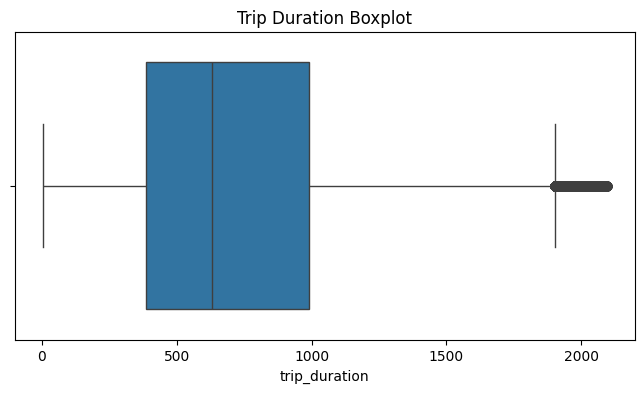

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(x=nyc_df['trip_duration']) # redrawing the boxplot after few outliers removal
plt.title("Trip Duration Boxplot") # The title of our plot mentioned at the top
plt.show()

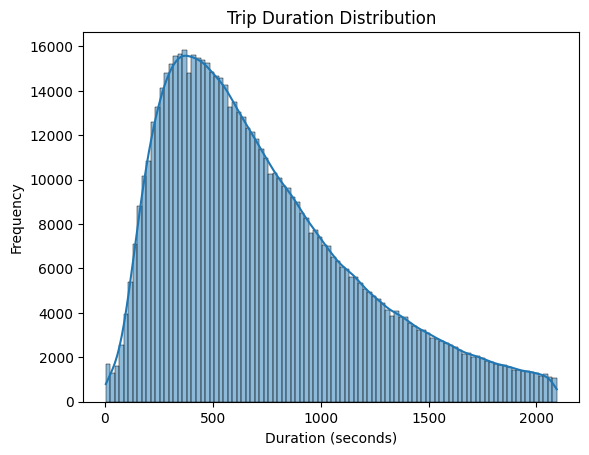

In [28]:
sns.histplot(nyc_df['trip_duration'], bins=100, kde=True) # To plot histogram
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (seconds)') # To write name on x-axis
plt.ylabel('Frequency')
plt.show()

Now our boxplot is much more cleaner compared to the above box plot which is having more outliers now out dataset is looking good with less number of outliers comparitively. if we further remove the outliers it might damage the composition of our dataset so we look to handle it in futher scenerios.

- The first plot shows the **pickup locations** of taxi rides. Similar to the dropoff plot, most of the pickups occur within a specific cluster, suggesting a common starting zone (like an urban center). Outliers are visible here too, which might also be caused by incorrect GPS readings or very distant pickup requests.

- The second plot shows the distribution of **dropoff locations** using longitude and latitude coordinates. The majority of dropoffs are concentrated in a dense cluster, indicating a central operating area (likely a city). However, there are also a few outliers—rides that ended far outside the central area, possibly due to data errors or long-distance trips.

In [29]:
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

# As part of data cleaning we must ensure the pickup_datetime into datetime format

In [30]:
nyc_df['pickup_date'] = nyc_df['pickup_datetime'].apply(lambda x: x.date()) 
# The lamda function takes pickup_dattime as input and extracts the date from it
nyc_df['pickup_time'] = nyc_df['pickup_datetime'].apply(lambda x: x.time())
# This lamda function takes the same pickup_dat
nyc_df.drop(columns=['pickup_datetime'], inplace=True)


In [31]:
nyc_df.head()

,id,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time
0,id1080784,2,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016-02-29,16:40:21
1,id0889885,1,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016-03-11,23:35:37
2,id0857912,2,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016-02-21,17:59:33
3,id3744273,2,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016-01-05,09:44:31
4,id0232939,1,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016-02-17,06:42:23


In [32]:
nyc_df['dropoff_date'] = nyc_df['dropoff_datetime'].apply(lambda x: x.date())
#  The lamda function takes pickup_dattime as input and extracts the date from it
nyc_df['dropoff_time'] = nyc_df['dropoff_datetime'].apply(lambda x: x.time())
# This lamda function takes the same pickup_dat
nyc_df.drop(columns=['dropoff_datetime'], inplace=True) 
# after seperating we remove the column from the dataset permenantly

In [33]:
nyc_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016-02-29,16:40:21,2016-02-29,16:47:01
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,2016-03-11,23:35:37,2016-03-11,23:53:57
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2016-02-21,17:59:33,2016-02-21,18:26:48
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2016-01-05,09:44:31,2016-01-05,10:03:32
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2016-02-17,06:42:23,2016-02-17,06:56:31


In [34]:
nyc_df.dtypes

id                     object
vendor_id               int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
pickup_date            object
pickup_time            object
dropoff_date           object
dropoff_time           object
dtype: object

In [35]:
# If format is like '18-05-2024'
nyc_df['pickup_date'] = pd.to_datetime(nyc_df['pickup_date'], format='%d-%m-%Y')
nyc_df['dropoff_date'] = pd.to_datetime(nyc_df['dropoff_date'], format='%d-%m-%Y')



In [36]:
nyc_df.dtypes
# we ensure the correct the format for date in our dataframe now

id                            object
vendor_id                      int64
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_date           datetime64[ns]
pickup_time                   object
dropoff_date          datetime64[ns]
dropoff_time                  object
dtype: object

### Data Transformation and Feature Engineering

### Summary:
  -  As part of data transformation process i have converted `store_and_fwd_flag` into binary number as they are ordinal data N maps to 0 and Y maps to 1
  -  As part of feature engeneering from the date i have gathered the feature `month`, `day_of_week` for trend analysis
  -  Using feature engeneering i also aquired  `pickup_hours` and `dropoff_hours`.
  -  we divide the time into bins to get the insights to busy hours in a day.
  -  Haversine formula is implemented to caluculate the distance when latitude and logitude is given rather than following eluclidian distance formula which is not accurate. Haversine formula takes earth's curvature into account and caluculates the distance where as euclidian formula caluculates it as a strainght line distance.
  -  I categorized the trip as short,medium,long which help us distinguish between the trips easily for reference.
  -  Then caluculated speed using **speed=distance/time** formula 
  - Identified outliers in the speed column with speeds more than 150km/hr which is not possible so identified outliers using boxplot and removed them which further improves my data quality and standard.

In [37]:
nyc_df['store_and_fwd_flag']

0         N
1         N
2         N
3         N
4         N
         ..
728873    N
728874    N
728875    N
728876    N
728877    N
Name: store_and_fwd_flag, Length: 692022, dtype: object

In [38]:
nyc_df['store_and_fwd_flag'] = nyc_df['store_and_fwd_flag'].str.strip().str.upper() 
#This ensures no empty spaces in our dataset again gives us the output of nan leading to error classification
# And to maintain consistency we change all the names into uppercase letter for better recognisation


In [39]:
nyc_df['store_and_fwd_flag'] = nyc_df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
nyc_df['store_and_fwd_flag']
# This particukar step indicates the data transformation this data is nominal data so assigning NO to 0 
# Yes to 1

0         0
1         0
2         0
3         0
4         0
         ..
728873    0
728874    0
728875    0
728876    0
728877    0
Name: store_and_fwd_flag, Length: 692022, dtype: int64

In [40]:
nyc_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016-02-29,16:40:21,2016-02-29,16:47:01
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016-03-11,23:35:37,2016-03-11,23:53:57
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016-02-21,17:59:33,2016-02-21,18:26:48
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016-01-05,09:44:31,2016-01-05,10:03:32
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016-02-17,06:42:23,2016-02-17,06:56:31


In [41]:
# Step 1: Convert to datetime
nyc_df['pickup_date'] = pd.to_datetime(nyc_df['pickup_date'])

# Step 2: Extract day and month names
nyc_df['day_of_week'] = nyc_df['pickup_date'].dt.day_name()   #  Monday, Tuesday
nyc_df['month'] = nyc_df['pickup_date'].dt.month_name()       #  January, February


In [42]:
def get_time_bin(hour):
    if 6 <= hour < 12:
        return 'Morning'     # This if-elif-else statement helps us to categorize
    elif 12 <= hour < 18:    # The data as part of transformation to get further insights
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Night'
    else:
        return 'Midnight'
# A simple if-elif-else statement make the code easy understandable and easy to implement
nyc_df['pickup_hour'] = pd.to_datetime(nyc_df['pickup_time'], format='%H:%M:%S').dt.hour
nyc_df['pickup_time_section'] = nyc_df['pickup_hour'].apply(get_time_bin)
nyc_df.head(10)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time,day_of_week,month,pickup_hour,pickup_time_section
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016-02-29,16:40:21,2016-02-29,16:47:01,Monday,February,16,Afternoon
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016-03-11,23:35:37,2016-03-11,23:53:57,Friday,March,23,Night
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016-02-21,17:59:33,2016-02-21,18:26:48,Sunday,February,17,Afternoon
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016-01-05,09:44:31,2016-01-05,10:03:32,Tuesday,January,9,Morning
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016-02-17,06:42:23,2016-02-17,06:56:31,Wednesday,February,6,Morning
5,id1918069,2,2,-73.993614,40.751884,-73.995422,40.723862,0,1455,2016-02-14,18:31:42,2016-02-14,18:55:57,Sunday,February,18,Night
6,id2429028,1,1,-73.965080,40.758915,-73.976807,40.764107,0,397,2016-04-20,20:30:14,2016-04-20,20:36:51,Wednesday,April,20,Night
7,id1663798,2,1,-73.963890,40.765434,-73.872429,40.774200,0,1101,2016-06-19,16:48:14,2016-06-19,17:06:35,Sunday,June,16,Afternoon
8,id2436943,2,2,-73.872887,40.774281,-73.979019,40.761879,0,1886,2016-03-28,19:17:03,2016-03-28,19:48:29,Monday,March,19,Night
9,id2933909,1,1,-73.987823,40.740982,-73.999153,40.686451,0,1429,2016-04-10,22:01:41,2016-04-10,22:25:30,Sunday,April,22,Night


Using the above code i created new features in the dataset namely the section of the day
if it is 0 to 6 its midnight if its 6 to 12 morning 12 to 18(24 hour fomat) evening 18 to 00 night which can help us provide insights in further sections as we move ahead

In [43]:
nyc_df['dropoff_hour'] = pd.to_datetime(nyc_df['dropoff_time'], format='%H:%M:%S').dt.hour

In [44]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  
    # Earth radius in kilometers this is taken into caluculation to assume earth radius and not to caluculate straight distance
    
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula the better formula available to caluculate distance between laltitude and longitude 
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c


In [45]:
nyc_df['trip_distance_km'] = haversine_distance(
    nyc_df['pickup_latitude'],
    nyc_df['pickup_longitude'],
    nyc_df['dropoff_latitude'],
    nyc_df['dropoff_longitude']
)  # the parameters are passed to the function haversine distance to caluculate the distance in km


In [46]:
nyc_df.head(10)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time,day_of_week,month,pickup_hour,pickup_time_section,dropoff_hour,trip_distance_km
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016-02-29,16:40:21,2016-02-29,16:47:01,Monday,February,16,Afternoon,16,1.199073
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016-03-11,23:35:37,2016-03-11,23:53:57,Friday,March,23,Night,23,4.129111
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016-02-21,17:59:33,2016-02-21,18:26:48,Sunday,February,17,Afternoon,18,7.250753
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016-01-05,09:44:31,2016-01-05,10:03:32,Tuesday,January,9,Morning,10,2.361097
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016-02-17,06:42:23,2016-02-17,06:56:31,Wednesday,February,6,Morning,6,4.328534
5,id1918069,2,2,-73.993614,40.751884,-73.995422,40.723862,0,1455,2016-02-14,18:31:42,2016-02-14,18:55:57,Sunday,February,18,Night,18,3.119711
6,id2429028,1,1,-73.965080,40.758915,-73.976807,40.764107,0,397,2016-04-20,20:30:14,2016-04-20,20:36:51,Wednesday,April,20,Night,20,1.143979
7,id1663798,2,1,-73.963890,40.765434,-73.872429,40.774200,0,1101,2016-06-19,16:48:14,2016-06-19,17:06:35,Sunday,June,16,Afternoon,17,7.763589
8,id2436943,2,2,-73.872887,40.774281,-73.979019,40.761879,0,1886,2016-03-28,19:17:03,2016-03-28,19:48:29,Monday,March,19,Night,19,9.043647
9,id2933909,1,1,-73.987823,40.740982,-73.999153,40.686451,0,1429,2016-04-10,22:01:41,2016-04-10,22:25:30,Sunday,April,22,Night,22,6.138310


In [47]:
nyc_df['trip_type'] = pd.cut(nyc_df['trip_distance_km'],
                             bins=[0, 2, 6, np.inf],
                             labels=['Short', 'Medium', 'Long'])
nyc_df['trip_type']  
# Categorize trips into 'Short', 'Medium', and 'Long' based on distance in kilometers

0          Short
1         Medium
2           Long
3         Medium
4         Medium
           ...  
728873     Short
728874     Short
728875    Medium
728876     Short
728877    Medium
Name: trip_type, Length: 692022, dtype: category
Categories (3, object): ['Short' < 'Medium' < 'Long']

In [48]:
nyc_df['trip_duration_min'] = (nyc_df['trip_duration'] / 60).astype(float)

In [49]:
nyc_df['trip_speed_kmph'] = (nyc_df['trip_distance_km'] / (nyc_df['trip_duration'] / 3600)).replace([np.inf, -np.inf], np.nan)
nyc_df.head()

# Caluculate the speed of trip speed=Distance/Time 
# seconds into hours in pandas (or Python generally), simply divide the value by 3600 (since 1 hour = 3600 seconds).

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,...,dropoff_time,day_of_week,month,pickup_hour,pickup_time_section,dropoff_hour,trip_distance_km,trip_type,trip_duration_min,trip_speed_kmph
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016-02-29,...,16:47:01,Monday,February,16,Afternoon,16,1.199073,Short,6.666667,10.791654
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016-03-11,...,23:53:57,Friday,March,23,Night,23,4.129111,Medium,18.333333,13.513454
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016-02-21,...,18:26:48,Sunday,February,17,Afternoon,18,7.250753,Long,27.250000,15.964960
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016-01-05,...,10:03:32,Tuesday,January,9,Morning,10,2.361097,Medium,19.016667,7.449562
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016-02-17,...,06:56:31,Wednesday,February,6,Morning,6,4.328534,Medium,14.133333,18.375851


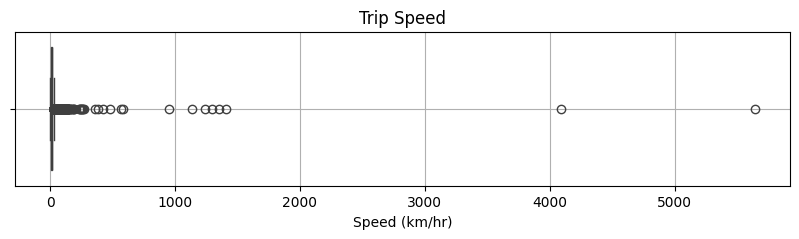

In [50]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=nyc_df['trip_speed_kmph'])
plt.title('Trip Speed')
plt.xlabel('Speed (km/hr)')
plt.grid(True)
plt.show()

In [51]:
# Calculate Q1, Q3, and IQR
Q1 = nyc_df['trip_speed_kmph'].quantile(0.25)
Q3 = nyc_df['trip_speed_kmph'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
nyc_df = nyc_df[(nyc_df['trip_speed_kmph'] >= lower_bound) & (nyc_df['trip_speed_kmph'] <= upper_bound)]

# Reset index (optional but recommended)
nyc_df.reset_index(drop=True, inplace=True)


In [52]:
nyc_df = nyc_df[(nyc_df['trip_speed_kmph'] >= lower_bound) & (nyc_df['trip_speed_kmph'] <= upper_bound)]

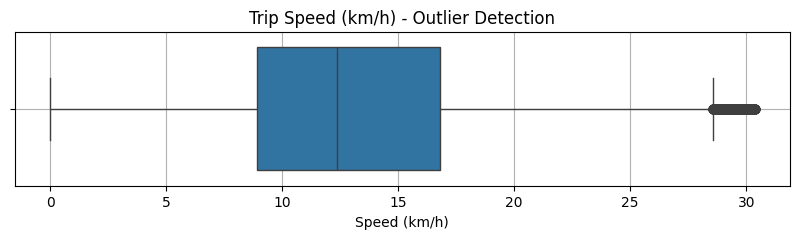

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=nyc_df['trip_speed_kmph'])
plt.title('Trip Speed (km/h) - Outlier Detection')
plt.xlabel('Speed (km/h)')
plt.grid(True)
plt.show()


In [54]:
# nyc_df = nyc_df[(nyc_df['trip_duration'] >= lower_bound) & (nyc_df['trip_duration'] <= upper_bound)]

In [55]:
nyc_df[nyc_df['trip_speed_kmph'] > 150]
# Display the rows with speed more than 150km
# Clearly no more outliers present making the speed in correct not too large which improves our data quality


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,...,dropoff_time,day_of_week,month,pickup_hour,pickup_time_section,dropoff_hour,trip_distance_km,trip_type,trip_duration_min,trip_speed_kmph


In [56]:
# Calculate the average duration for long trips
long_trip_duration_mean = nyc_df[nyc_df['trip_type'] == 'Long']['trip_duration'].mean()
print("Average duration for long trips (seconds):", long_trip_duration_mean)

# Calculate the average speed for long trips
long_trip_speed_mean = nyc_df[nyc_df['trip_type'] == 'Long']['trip_speed_kmph'].mean()
print("Average speed for long trips (km/h):", long_trip_speed_mean)

# In this analysis, we define 'Long' trips as those with a trip distance of 6 km or more.
# The average trip duration is approximately 1,461 seconds (~23.5 minutes).
#  The average speed for these trips is around 21.11 km/h.


Average duration for long trips (seconds): 1461.075982746605
Average speed for long trips (km/h): 21.117280560570002


### Exploratory Visualizations with insights 

### summary:
  -  We previously completed data cleaning process so we proceed by finding some key insights from the data
  - The trip duration is mostly below 1000seconds (16 min) there are some trips above also referens to might be a long travelling trip
  -  The scatter plot depicts that the distance increase the time increases which indicates the distance and time are directly proportional to each other
  -  The avg distance the taxis cover is 2.5km with a maximum distance of 17km
  -  There are 2 vendors who run their taxi in the newyork city as per dataset and vendor is likely having more taxi's running
  -  The average trip duration for each passenger count is clearly informed in the histogram.
  -  The pie chart represents the distribution of trips across each months
  -  The trip duration distribution type is also represented across short,medium,long trips.
  -  As we know the trip duration might get skewed due to long duration trips so i have seperately drew 3 graphs which represnts mean,median for short,medium, long trips respectively.
  - The average speed for each type of trip is also indicated using the bar graph.

In [57]:
nyc_df['trip_duration']

0          400
1         1100
2         1635
3         1141
4          848
          ... 
662768     296
662769     315
662770     673
662771     447
662772    1224
Name: trip_duration, Length: 662773, dtype: int64

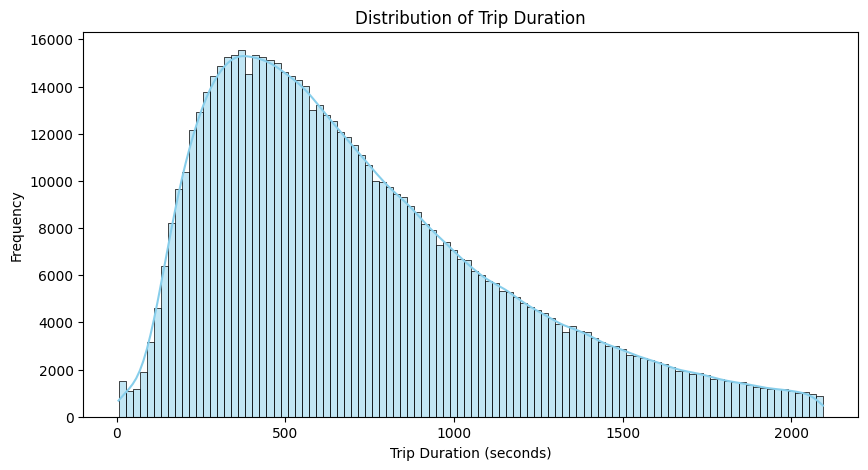

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(nyc_df['trip_duration'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

The above histplot clearly indicates that most of the trips are concentrated mostly below 1000 seconds(16 min approx) which means that the taxi data available for us is for the same area or locality or city not too far away 
 - One more insight is the max trip duration approx 2200 seconds(36 minutes approx) previoustly we had 1939736 seconds (22 days) which we removed useing box plot 

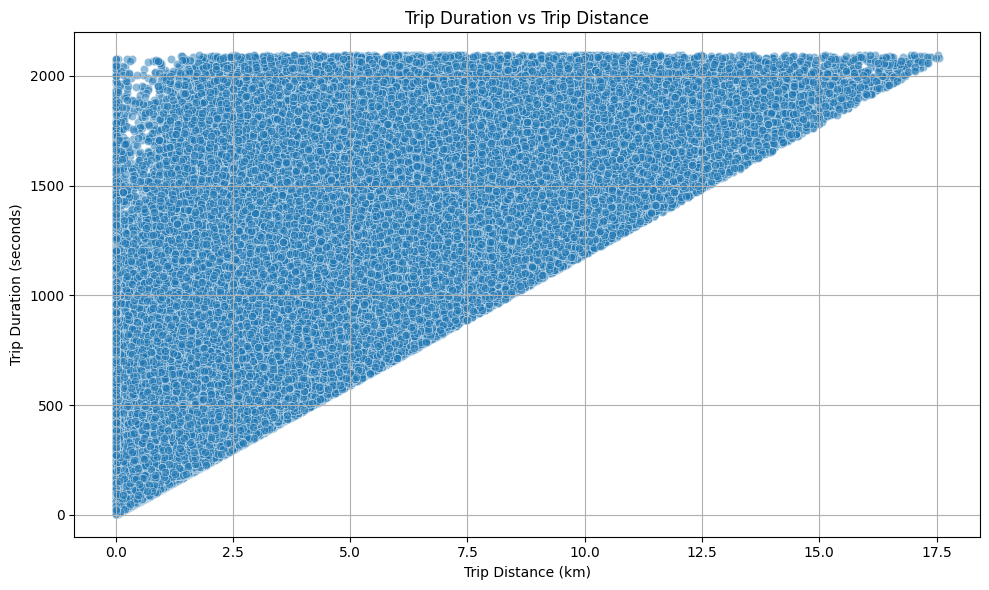

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance_km', y='trip_duration', data=nyc_df, alpha=0.5)

plt.title('Trip Duration vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

The above scatter plot provides us the insight of as the trip distance increase the trip duration also increase as we have removed the outliers in the earlier stage

In [60]:
# Step 1: Inspect the distribution to find a cutoff
nyc_df['trip_distance_km'].describe()


count    662773.000000
mean          2.625362
std           2.180272
min           0.000000
25%           1.181490
50%           1.941694
75%           3.299332
max          17.548216
Name: trip_distance_km, dtype: float64

C:\Users\venig\AppData\Local\Temp\ipykernel_30020\2779273963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vendor_id', data=nyc_df, palette='pastel')


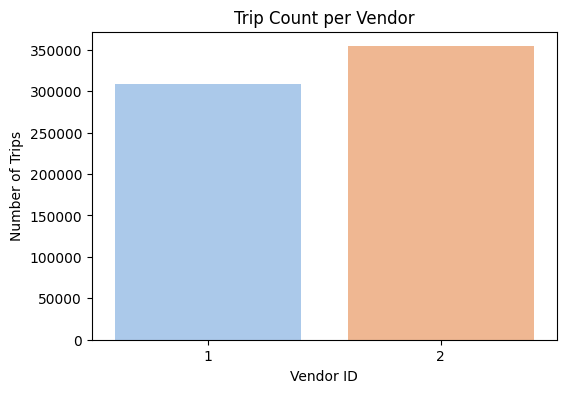

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='vendor_id', data=nyc_df, palette='pastel')
plt.title('Trip Count per Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Trips')
plt.show()

Both the vendors who are part of the business indicates that vendor 2 is slightly leading than vendor 1 in term of total trips his vehicle is doing

C:\Users\venig\AppData\Local\Temp\ipykernel_30020\1517169322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='trip_duration', data=avg_duration, palette='Blues_d')


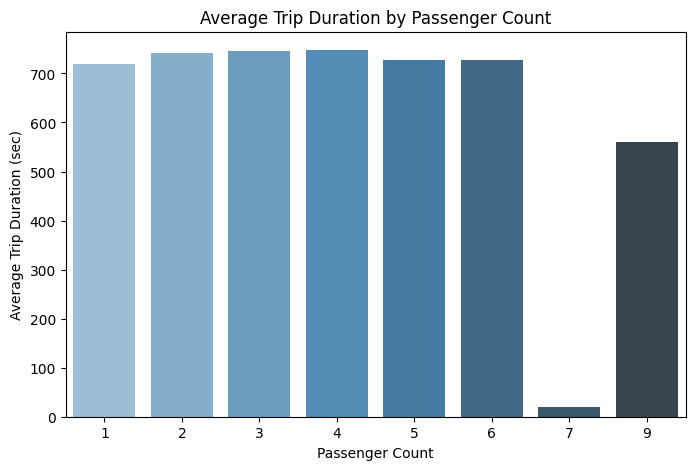

In [62]:
avg_duration = nyc_df.groupby('passenger_count')['trip_duration'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='passenger_count', y='trip_duration', data=avg_duration, palette='Blues_d')
plt.title('Average Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Duration (sec)')
plt.show()

passenger count of 3,4 tend to to have more average trip duration indicating may be of a shared taxi for longer distances 

In [63]:
passenger_counts = nyc_df['passenger_count'].value_counts().sort_index()

# Display the counts
print(passenger_counts)

passenger_count
1    471287
2     94693
3     26975
4     12718
5     35203
6     21895
7         1
9         1
Name: count, dtype: int64


As we removed some outliers the passenger count of 8,9 is also removed from the dataset indicating that those datapoints are very instable in our dataset and we can see passenger count of 1 is the most among all.

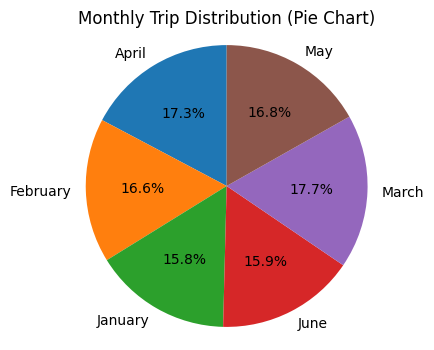

In [64]:
monthly_counts = nyc_df['month'].value_counts().sort_index()  # Alphabetical order


# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Monthly Trip Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

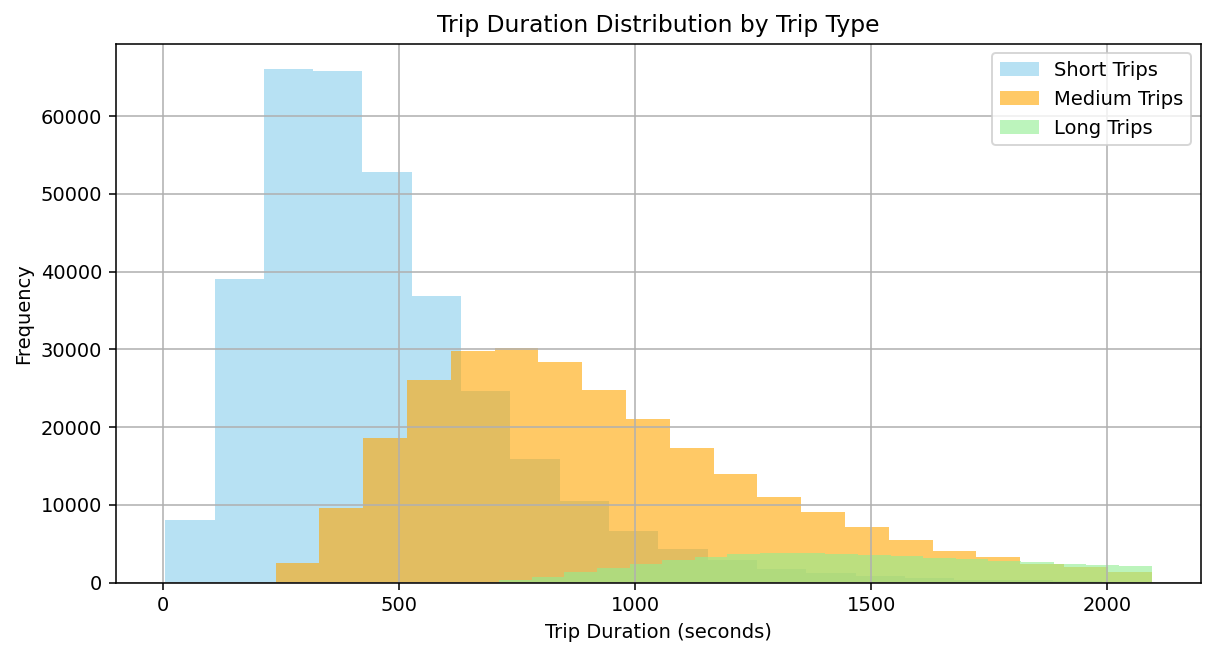

In [65]:
import matplotlib.pyplot as plt

# Set image resolution
plt.figure(figsize=(10, 5), dpi=140)

# Plot histograms for each trip type
plt.hist(nyc_df[nyc_df['trip_type'] == 'Short']['trip_duration'], 
         bins=20, alpha=0.6, label='Short Trips', color='skyblue')

plt.hist(nyc_df[nyc_df['trip_type'] == 'Medium']['trip_duration'], 
         bins=20, alpha=0.6, label='Medium Trips', color='orange')

plt.hist(nyc_df[nyc_df['trip_type'] == 'Long']['trip_duration'], 
         bins=20, alpha=0.6, label='Long Trips', color='lightgreen')

# Add labels and title
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Trip Duration Distribution by Trip Type')
plt.legend()
plt.grid(True)
plt.show()

# Short trips dominate in count and are completed within 10–12 minutes. There are more short trips in our dataset.

# Medium trips are common but less frequent, often lasting between 10 and 20 minutes.

# Long trips are relatively rare but still significant, extending past 30 minutes.

# The graph shows smooth transitions between categories with some overlapping durations,
# especially between 500 and 1000 seconds.

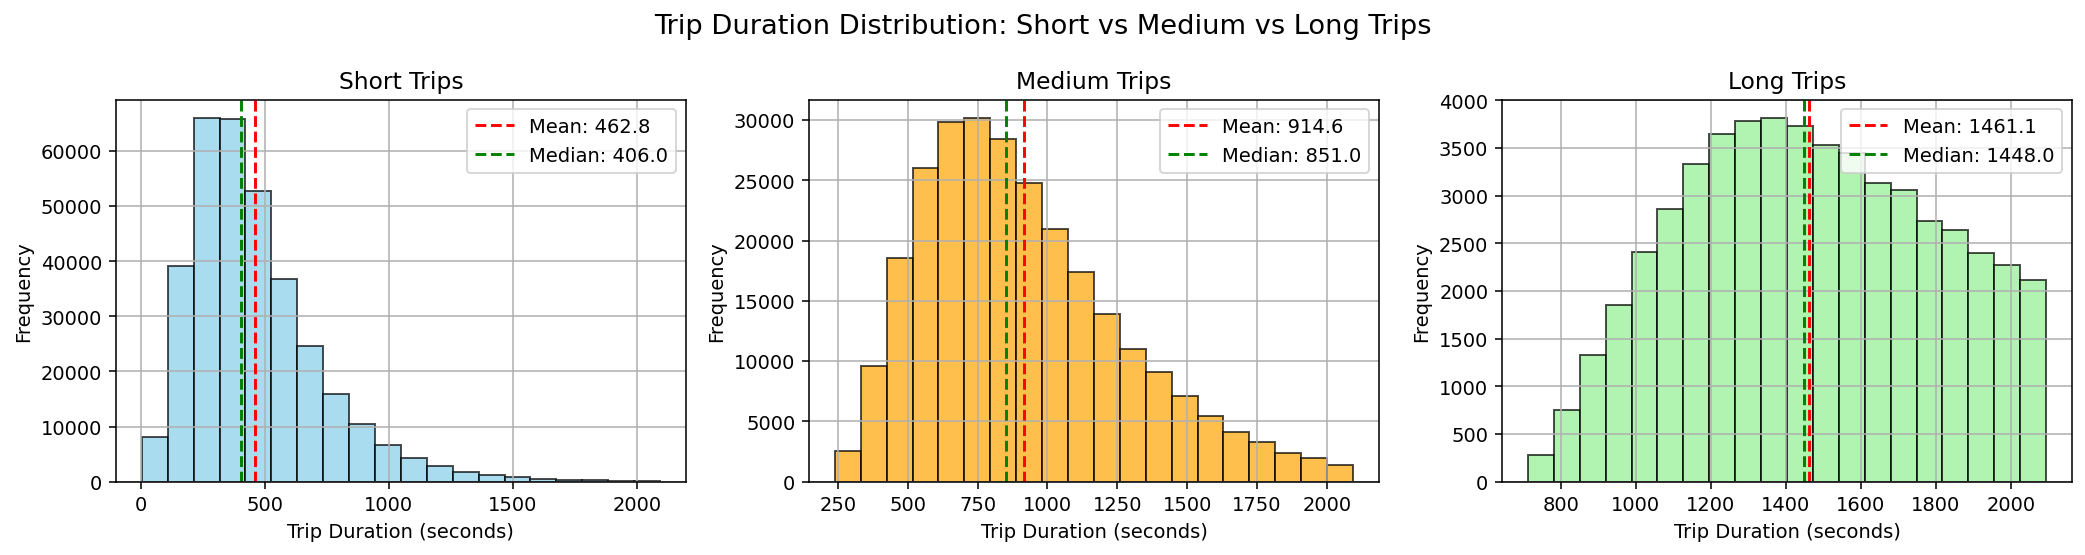

In [66]:
import matplotlib.pyplot as plt

# Define trip types
trip_types = ['Short', 'Medium', 'Long']
colors = ['skyblue', 'orange', 'lightgreen']

# Set up subplots
plt.figure(figsize=(15, 4), dpi=140)

for i, trip_type in enumerate(trip_types):
    plt.subplot(1, 3, i+1)

    # Filter data for current type
    data = nyc_df[nyc_df['trip_type'] == trip_type]['trip_duration']

    # Plot histogram
    plt.hist(data, bins=20, alpha=0.7, color=colors[i], edgecolor='black')

    # Add mean and median
    plt.axvline(data.mean(), color='red', linestyle='--', label=f"Mean: {data.mean():.1f}")
    plt.axvline(data.median(), color='green', linestyle='--', label=f"Median: {data.median():.1f}")

    # Labels and titles
    plt.title(f'{trip_type} Trips')
    plt.xlabel('Trip Duration (seconds)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.suptitle('Trip Duration Distribution: Short vs Medium vs Long Trips', fontsize=14)
plt.tight_layout()
plt.show()


# short trips have a steep drop-off after the peak, indicating short travel durations dominate.
# with a mean trip duration of 462.4 and median 406

# Medium trips show a broader, more spread-out peak. 
# with a mean trip duration of 914.7 seconds(15.5 minutes) and median  of 851 seconds

# Long trips display a balanced bell-shaped distribution.
# with mean trip duration 1461.2 seconds(23 minutes) and median of 1448 seconds similar to the mean.


C:\Users\venig\AppData\Local\Temp\ipykernel_30020\3523001878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nyc_df.groupby('trip_type')['trip_speed_kmph'].mean().plot(kind='bar', color='mediumseagreen')


Text(0.5, 1.0, 'Average Speed by Trip Type')

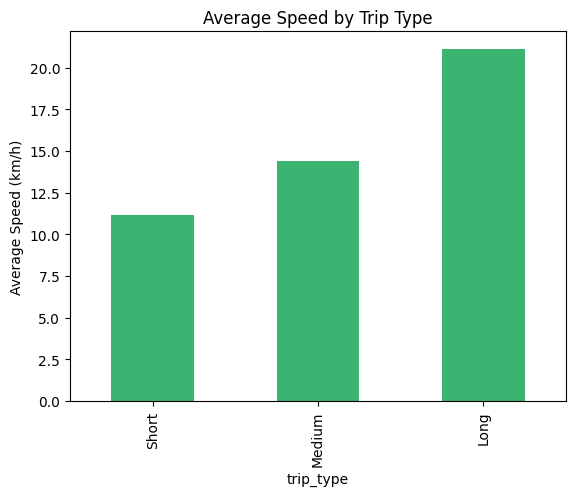

In [67]:
nyc_df.groupby('trip_type')['trip_speed_kmph'].mean().plot(kind='bar', color='mediumseagreen')
# we use groupby to combine the details with same type here it is trip_speed_kmph
plt.ylabel('Average Speed (km/h)')
plt.title('Average Speed by Trip Type')

# As the trip duration increases, the average speed also increases. 
# This suggests that longer trips are likely taken on faster speed or on routes with fewer interruptions (like traffic or signals),
#  whereas shorter trips may involve slower modes  or occur in denser urban areas with more stops and delays.

### Statistical Insights

### Summary: 
- Statistical insights are of two types 
-  descriptive statistic(mean,mode,range,standard deviation,variance,pie plots,bar plots),
-  inferential statistics (probility,hypothesis testing)
-  implemented identyfying variance and standard deviation with trip-duration mot dread out apart from mean
-  correlation matrix indicating the positive correlation between `trip_duration` and `trip_distance_km`
-  The mean trip duration of both vendor 1 and vendor 2 is almost the same with very slight differences.
-  I have also implemented inferential statistics where that a random datapoint selected in the data had a probility of belonging to single customer travelling is 0.71 and 2 passenger travelling is o.14.

-  I have also implemented a cross tab function
   -  This table shows the distribution of passenger counts by day of the week. Most rides across all days have 1 passenger, indicating that solo trips dominate. Very few trips have more than 4 passengers, and trips with 7 passengers are extremely rare or non-existent, showing limited demand for high-capacity rides.


-  Implemented hypothesis testing part of inferential statistics
    -  This two-tailed proportion z-test was used to check if the proportion of trips with exactly 2 passengers is equal to 15%. With a p-value of 0.0000, we reject the null hypothesis, indicating that the actual proportion is significantly different from 15%. This insight helps vendors better understand common group sizes for more accurate vehicle assignment.

In [68]:
nyc_df[['trip_duration', 'trip_distance_km']].describe()

,trip_duration,trip_distance_km
count,662773.000000,662773.000000
mean,725.511142,2.625362
std,438.956447,2.180272
min,5.000000,0.000000
25%,386.000000,1.181490
50%,627.000000,1.941694
75%,977.000000,3.299332
max,2094.000000,17.548216


In [69]:
import pandas as pd

# Select numeric columns
numeric_df = nyc_df.select_dtypes(include='number')

# Prepare an empty list to collect results
results = []

# Loop through each numeric column
for column in numeric_df.columns:
    variance = numeric_df[column].var()
    std_dev = numeric_df[column].std()
    results.append({'Column': column, 'Variance': variance, 'Std_Deviation': std_dev})

# Convert list to DataFrame
stats_table = pd.DataFrame(results)
print(stats_table)




                Column       Variance  Std_Deviation
0            vendor_id       0.248845       0.498844
1      passenger_count       1.719313       1.311226
2     pickup_longitude       0.004311       0.065659
3      pickup_latitude       0.000663       0.025758
4    dropoff_longitude       0.004347       0.065932
5     dropoff_latitude       0.000855       0.029235
6   store_and_fwd_flag       0.004983       0.070588
7        trip_duration  192682.762704     438.956447
8          pickup_hour      40.456913       6.360575
9         dropoff_hour      41.404744       6.434652
10    trip_distance_km       4.753587       2.180272
11   trip_duration_min      53.522990       7.315941
12     trip_speed_kmph      34.926190       5.909838


We calculated the **variance** and **standard deviation** for each numeric column in the NYC taxi dataset using a `for` loop. This helps us understand the **spread and variability** of values in each feature.

- High variance means the trip durations are very spread out — some trips are extremely short, and others are very long.
- Coordinates (pickup/dropoff latitude & longitude) have low variance, as expected for trips within a city. Useful for calculating derived features like distance 
- trip_distance_km and passenger_count show healthy variance

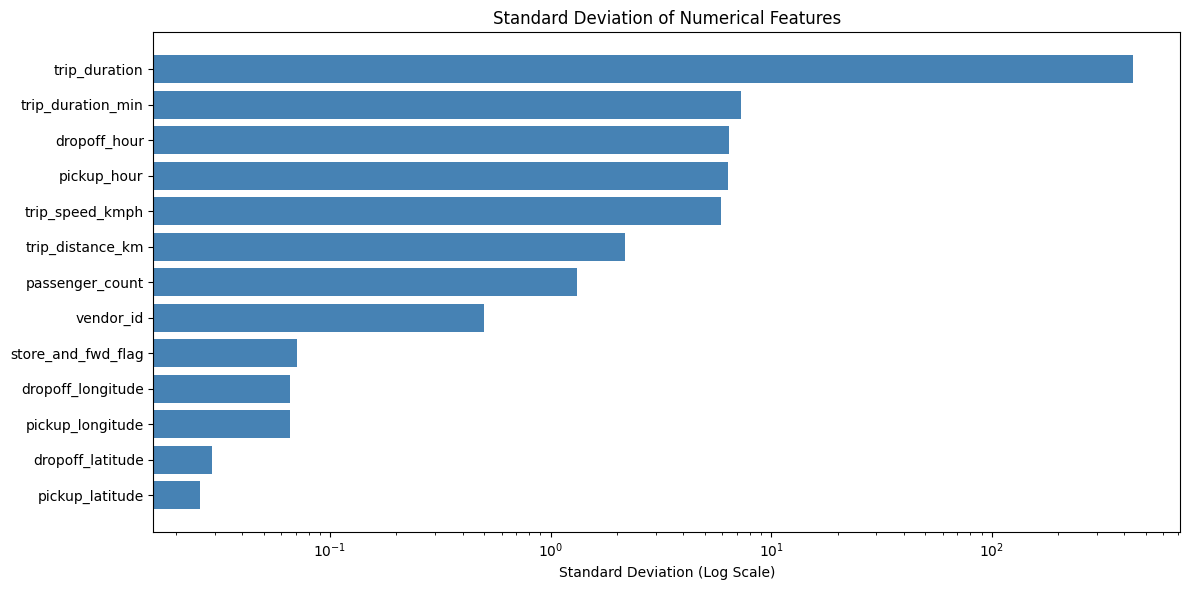

In [121]:
import matplotlib.pyplot as plt

# Sort by standard deviation
stats_table_sorted = stats_table.sort_values(by='Std_Deviation', ascending=False)

# Plot with log scale
plt.figure(figsize=(12, 6))
plt.barh(stats_table_sorted['Column'], stats_table_sorted['Std_Deviation'], color='steelblue')
plt.xlabel('Standard Deviation (Log Scale)')
plt.title('Standard Deviation of Numerical Features')
plt.xscale('log')  # Apply logarithmic scale to X-axis
plt.gca().invert_yaxis()  # Put highest std dev at the top
plt.tight_layout()
plt.show()

# higher standard deviation trip_duration
# means that values are widely spread out — some trips are very short, others are very long.
# this graph is drawn in logarithamic form for better interpretation


<Axes: xlabel='passenger_count', ylabel='count'>

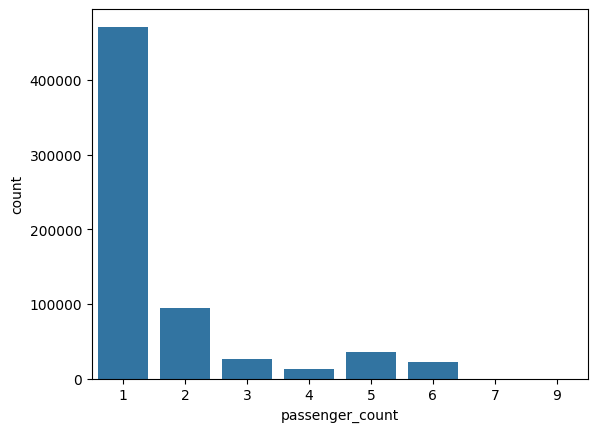

In [71]:
import seaborn as sns
sns.countplot(x='passenger_count',data=nyc_df)

                  trip_duration  trip_distance_km  passenger_count
trip_duration          1.000000          0.739833         0.010809
trip_distance_km       0.739833          1.000000         0.006051
passenger_count        0.010809          0.006051         1.000000


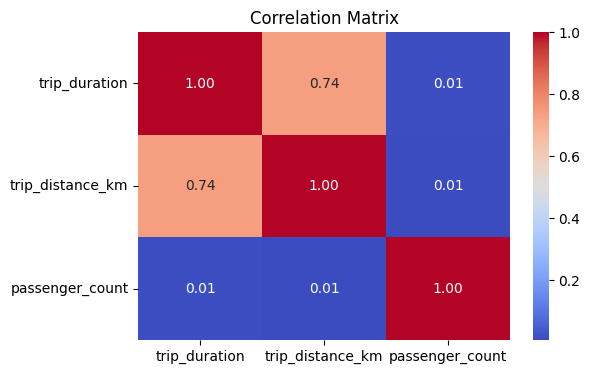

In [72]:
corr_matrix = nyc_df[['trip_duration', 'trip_distance_km', 'passenger_count']].corr()

print(corr_matrix)

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The important observation is that the target variable trip duration is 74% correlated with the trip_distance indicating strong relation between them.

In [73]:
avg_stats_per_vendor = nyc_df.groupby('vendor_id')[['trip_duration', 'trip_distance_km']].mean().reset_index()

print(avg_stats_per_vendor)


   vendor_id  trip_duration  trip_distance_km
0          1     723.078404          2.615407
1          2     727.634232          2.634050


Text(0.5, 0, 'Vendor ID')

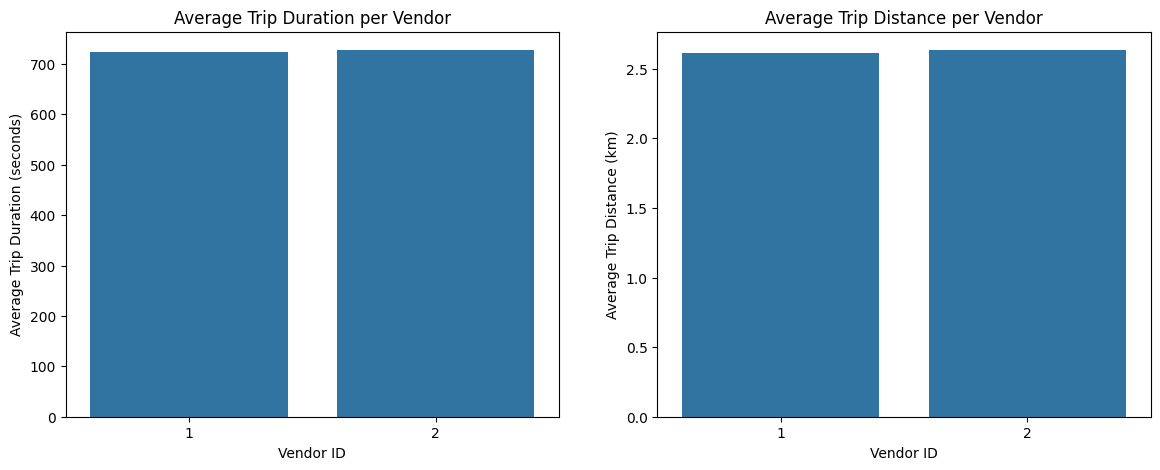

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot Average Trip Duration per Vendor
sns.barplot(x='vendor_id', y='trip_duration', data=avg_stats_per_vendor, ax=axes[0])
axes[0].set_title('Average Trip Duration per Vendor')
axes[0].set_ylabel('Average Trip Duration (seconds)')
axes[0].set_xlabel('Vendor ID')

# Plot Average Trip Distance per Vendor
sns.barplot(x='vendor_id', y='trip_distance_km', data=avg_stats_per_vendor, ax=axes[1])
axes[1].set_title('Average Trip Distance per Vendor')
axes[1].set_ylabel('Average Trip Distance (km)')
axes[1].set_xlabel('Vendor ID')

This bargraph demostrates the average trip duration of taxis for each vendor indicating that the both vendors have almost the same average trip durations which is also proven that the average distance is also the similar from both the vendor sides.

The trips are evenly distributed across every month in our dataset we have data available for 6 months from jan to june with highest trips in march 17.7% slightly leading than april 17.2%

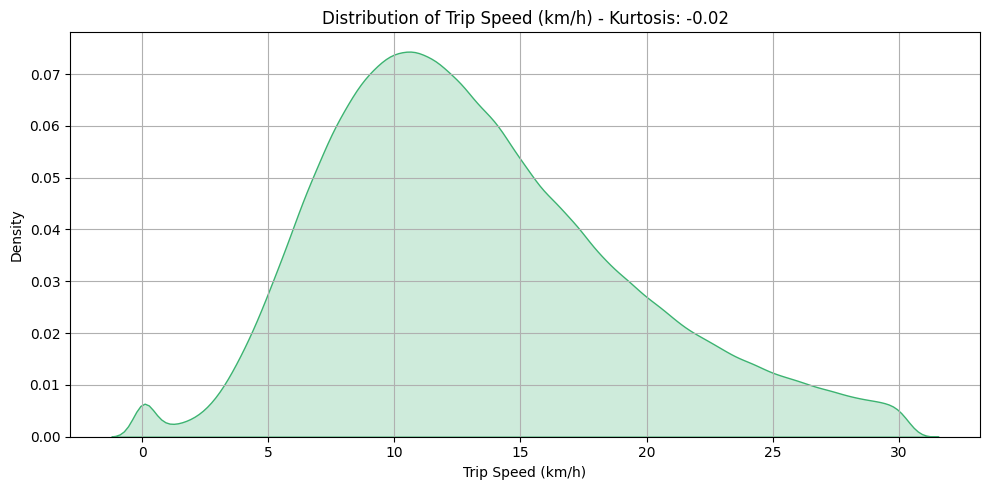

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Filters trip speeds ≤ 100 km/h to avoid skew from outliers
filtered_speed = nyc_df[nyc_df['trip_speed_kmph'] <= 100]['trip_speed_kmph']

# Calculate kurtosis
speed_kurt = kurtosis(filtered_speed)

# Plot KDE (density curve) for trip speed
plt.figure(figsize=(10, 5))
sns.kdeplot(filtered_speed, fill=True, color='mediumseagreen')
plt.title(f"Distribution of Trip Speed (km/h) - Kurtosis: {speed_kurt:.2f}")
plt.xlabel("Trip Speed (km/h)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Most trips occur at speeds around 10–12 km/h, consistent with congested urban driving in NYC.
#The kurtosis value of -0.02 for the trip speed distribution (in km/h)
#  indicates a platykurtic distribution, meaning the data has
# A flatter peak than a normal distribution Lighter tails, with fewer extreme speed values

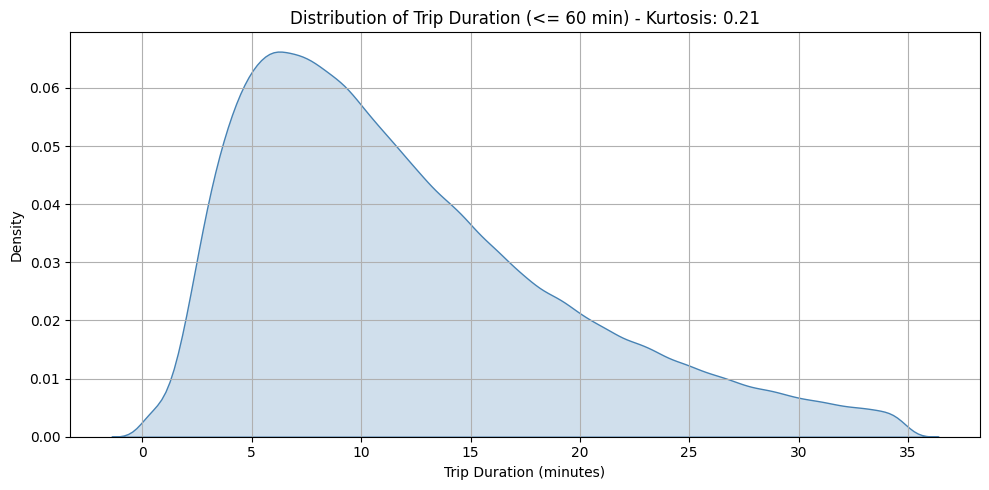

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Ensure trip_duration_min exists (in minutes)
nyc_df['trip_duration_min'] = nyc_df['trip_duration'] / 60

# Filter to reasonable values to avoid extreme outliers skewing the plot
filtered_data = nyc_df[nyc_df['trip_duration_min'] <= 60]['trip_duration_min']

# Calculate kurtosis
kurt = kurtosis(filtered_data)

# Plot the curve
plt.figure(figsize=(10, 5))
sns.kdeplot(filtered_data, fill=True, color='steelblue')
plt.title(f"Distribution of Trip Duration (<= 60 min) - Kurtosis: {kurt:.2f}")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()


-  Only trips with a duration of 60 minutes or less are considered.
-  Kurtosis = 0.21, which is close to zero, indicates
-  The distribution has a moderate peak and moderate tails (neither very heavy nor very light tails).
-  It’s platykurtic, meaning flatter than a normal distribution.

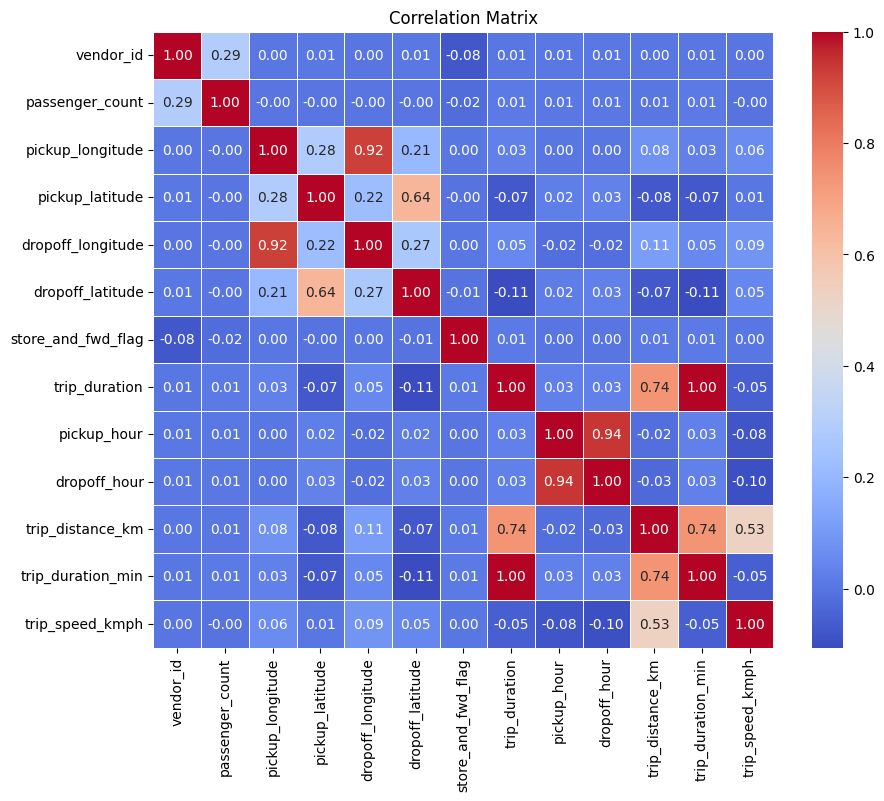

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = nyc_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


 Correlation Matrix Analysis

The correlation matrix above presents the pairwise correlation coefficients between various features in the dataset. Key observations include:

- **Trip Duration and Trip Distance (`0.69`)**: A strong positive correlation, indicating that longer trips in time generally correspond to longer distances. This makes intuitive sense and validates the data quality.

- **Pickup and Dropoff Coordinates**:
  - `pickup_longitude` and `dropoff_longitude` have a high correlation (`0.87`), suggesting that longitude values for pickup and dropoff locations are often geographically aligned.
  - `pickup_latitude` and `dropoff_latitude` show moderate correlation (`0.56`), indicating some consistency in latitude as well, but with more variability compared to longitude.

- **Other Features**:
  - Most other features show weak or negligible correlations with each other and with `trip_duration`, such as `passenger_count`, `pickup_hour`, and `vendor_id`, implying limited linear relationships.
  - `pickup_hour` has very low correlation with `trip_duration` (`0.03`), suggesting that time of pickup has minimal direct influence on how long the trip lasts.

This correlation matrix is useful for feature selection and data understanding. Features like `trip_distance_km` can be strong predictors of `trip_duration`, while others like `passenger_count` and `pickup_hour` may be less influential in linear models.


In [78]:
# The probility of a selected point belongs to a passenger with count 0
# Total number of trips
# Total number of trips
total_trips = len(nyc_df)

# Loop through passenger counts from 0 to 7
for count in range(1, 10):
    count_trips = (nyc_df['passenger_count'] == count).sum()
    probability = count_trips / total_trips
    print(f"Probability that a selected trip has {count} passenger(s): {probability:.8f}")




Probability that a selected trip has 1 passenger(s): 0.71108358
Probability that a selected trip has 2 passenger(s): 0.14287396
Probability that a selected trip has 3 passenger(s): 0.04070021
Probability that a selected trip has 4 passenger(s): 0.01918907
Probability that a selected trip has 5 passenger(s): 0.05311472
Probability that a selected trip has 6 passenger(s): 0.03303544
Probability that a selected trip has 7 passenger(s): 0.00000151
Probability that a selected trip has 8 passenger(s): 0.00000000
Probability that a selected trip has 9 passenger(s): 0.00000151


The above code indicating that the insight that a randomly selected row having 1 passenger trip is 71% which is majority which is meant conditional probility given that monday what is thae probility of single customer travelling on monday etc.. are depicted in the above code.

In [79]:
crosstab4 = pd.crosstab(nyc_df['day_of_week'], nyc_df['vendor_id'])
print(crosstab4)


vendor_id        1      2
day_of_week              
Friday       47447  54136
Monday       39429  45433
Saturday     47357  54417
Sunday       40721  47151
Thursday     46348  52504
Tuesday      42789  49521
Wednesday    44772  50748


Every day vendor 2 had more trips compared to vendor 1 

In [80]:
total_km_by_vendor = nyc_df[nyc_df['vendor_id'].isin([1, 2])].groupby('vendor_id')['trip_distance_km'].sum()

print("Total kilometers traveled by each vendor:")
print(total_km_by_vendor)

Total kilometers traveled by each vendor:
vendor_id
1    807802.554674
2    932216.810204
Name: trip_distance_km, dtype: float64


Total Kilometers Traveled by Each Vendor

The total distance covered by each vendor based on the `trip_distance_km` column is:

- **Vendor 1**: 8,08,000 km
- **Vendor 2**: 9,32,494.0 km

This indicates that Vendor 2 has traveled a significantly higher total distance compared to Vendor 1. As we have seen it in above code also where vendor 2 had more trips making the above statement strong the km travelled by vendor 2 is more that vendor 1.


In [81]:
ct = pd.crosstab(nyc_df['day_of_week'], nyc_df['passenger_count'])
ct

passenger_count,1,2,3,4,5,6,7,9
day_of_week,,,,,,,,
Friday,72505,14366,4103,1961,5327,3320,0,1
Monday,61465,11573,3275,1510,4289,2750,0,0
Saturday,68112,17143,4915,2563,5540,3501,0,0
Sunday,59561,14253,4244,2027,4871,2916,0,0
Thursday,72104,13073,3597,1603,5196,3279,0,0
Tuesday,67542,11901,3412,1474,4894,3086,1,0
Wednesday,69998,12384,3429,1580,5086,3043,0,0


The above cross tab function enables us to infer that mostly passeger count of 1,2 are hiring taxi to reach their destination because all the passenger count of 1,2 are above 10,000 whereas other have less than 10,000 indicating mostly a car has 1 or 2 passengers in most cases 

In [82]:
import pandas as pd


nyc_df['pickup_date'] = pd.to_datetime(nyc_df['pickup_date'])
nyc_df['day_of_week'] = nyc_df['pickup_date'].dt.day_name()

# Create a crosstab of day vs passenger count
ct = pd.crosstab(nyc_df['day_of_week'], nyc_df['passenger_count'])

# Normalize across each row to get conditional probabilities P(passenger_count | day)
conditional_probs = ct.div(ct.sum(axis=1), axis=0)

# Display conditional probabilities for Monday
print("Conditional Probability P(passenger_count | Monday):")
print(conditional_probs.loc['Monday'])


Conditional Probability P(passenger_count | Monday):
passenger_count
1    0.724294
2    0.136374
3    0.038592
4    0.017794
5    0.050541
6    0.032406
7    0.000000
9    0.000000
Name: Monday, dtype: float64


On Monday the cars have a single customer travelling in the taxi with the probility of 72%

In [83]:
#  Is the true proportion of trips with exactly 2 passengers equal to 15%?


# null hypothesis p=0.15
# alternative hypothesis p != 0.15

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Total number of trips
n = len(nyc_df)

# Number of trips with exactly 2 passengers
x = (nyc_df['passenger_count'] == 2).sum()

# Hypothesized proportion
p0 = 0.15  # 15%

# Perform one-sample z-test
stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Z-statistic: -16.5780
P-value: 0.0000


We tested whether the true proportion of NYC taxi trips with exactly **2 passengers** is **equal to 15%**.
Since the **p-value < 0.05**, we **reject the null hypothesis**.

There is **strong statistical evidence** that the true proportion of 2-passenger trips is **not equal to 15%** in the NYC taxi dataset.

In [84]:
from statsmodels.stats.proportion import proportions_ztest

# Test if proportion of 1-passenger trips is 71%
passenger_1_count = (nyc_df['passenger_count'] == 1).sum()
x = passenger_1_count
n = total_trips
p0 = 0.7116

stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Z-statistic: -0.9275
P-value: 0.3536


- Z-statistic ≈ 0  The sample proportion is very close to the hypothesized value.

- P-value = 0.4  Much greater than 0.05

- here the p value is grater than 0.05 so we failed to reject the null hypothesis 


### Geographical Insights 

C:\Users\venig\AppData\Local\Temp\ipykernel_30020\2914417129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_time_section', data=nyc_df, palette='Set2')


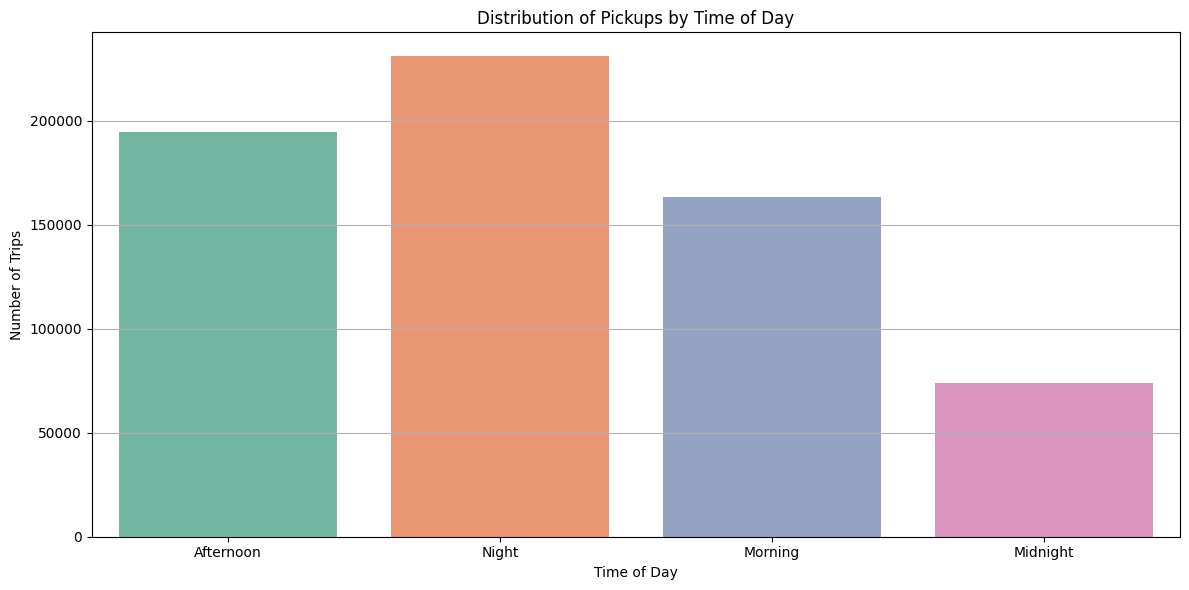

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of pickups by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_time_section', data=nyc_df, palette='Set2')

# Add titles and labels
plt.title('Distribution of Pickups by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


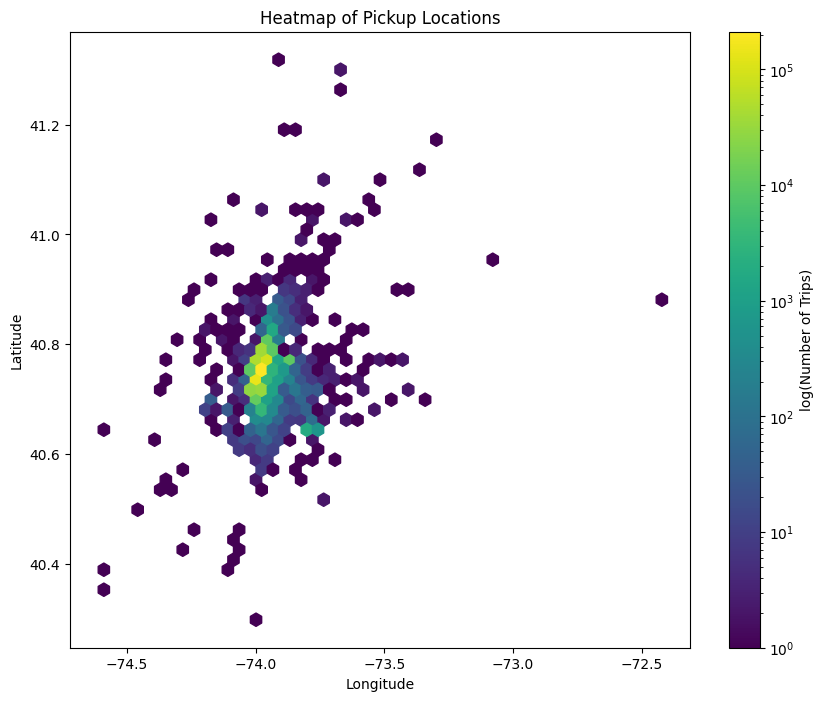

In [86]:
# Filter to valid coordinate range
nyc_df = nyc_df[
    (nyc_df['pickup_latitude'] >= 40) & (nyc_df['pickup_latitude'] <= 42) &
    (nyc_df['pickup_longitude'] >= -80) & (nyc_df['pickup_longitude'] <= -70)
]

# Now plot the heatmap
plt.figure(figsize=(10, 8))
plt.hexbin(
    nyc_df['pickup_longitude'], nyc_df['pickup_latitude'], 
    gridsize=50, cmap='viridis', bins='log'
)
plt.colorbar(label='log(Number of Trips)')
plt.title("Heatmap of Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


#Insight from this plot indicates the presence of pickup locations indicating more pickup locations at the top right corner

In [87]:
nyc_df.shape

(662765, 22)

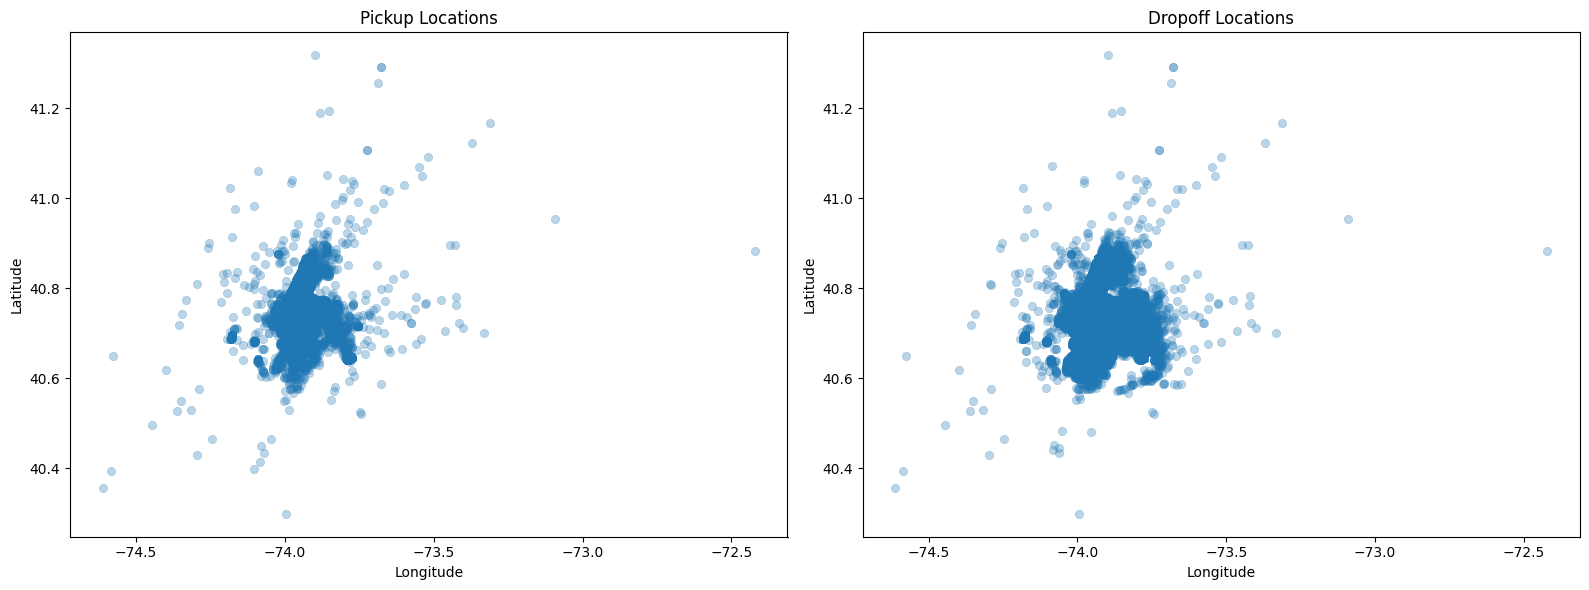

In [88]:
plt.figure(figsize=(16, 6))

# Pickup Locations
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='pickup_longitude', y='pickup_latitude',
    data=nyc_df.sample(len(nyc_df), random_state=1),
    alpha=0.3, edgecolor=None
)
plt.title("Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Dropoff Locations
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='dropoff_longitude', y='dropoff_latitude',
    data=nyc_df.sample(len(nyc_df), random_state=1),
    alpha=0.3, edgecolor=None
)
plt.title("Dropoff Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

In [89]:
# Round pickup coordinates to cluster nearby points (approx. 0.01° ~ 1km)
nyc_df['pickup_area'] = nyc_df['pickup_latitude'].round(2).astype(str) + ',' + nyc_df['pickup_longitude'].round(2).astype(str)

pickup_area_duration = nyc_df.groupby('pickup_area')['trip_duration'].mean().sort_values(ascending=False).head(10)
print(pickup_area_duration)


pickup_area
40.58,-73.97    2093.000000
40.55,-73.84    2091.000000
40.66,-73.81    2056.000000
40.68,-73.8     2018.000000
40.69,-74.02    1971.000000
40.71,-73.69    1970.000000
40.7,-73.79     1905.000000
40.62,-73.95    1780.000000
40.64,-73.92    1712.000000
40.78,-73.87    1699.666667
Name: trip_duration, dtype: float64


In [90]:
pickup_counts = nyc_df.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='trip_count')
top_pickups = pickup_counts.sort_values('trip_count', ascending=False).head(100)
top_pickups


,pickup_latitude,pickup_longitude,trip_count
645020,40.821003,-73.954666,18
532046,40.773762,-73.870888,7
289953,40.751129,-73.994118,7
537045,40.774120,-73.873123,6
290759,40.751179,-73.994118,6
...,...,...,...
531880,40.773750,-73.870972,4
290514,40.751163,-73.994141,4
275847,40.750172,-73.991501,4
275469,40.750149,-73.991310,4


In [91]:
# Round coordinates to 4 decimal places (~11 meters)
nyc_df['pickup_lat_rounded'] = nyc_df['pickup_latitude'].round(3)
nyc_df['pickup_lon_rounded'] = nyc_df['pickup_longitude'].round(3)

# Group and count by rounded coordinates
pickup_counts_rounded = nyc_df.groupby(['pickup_lat_rounded', 'pickup_lon_rounded']).size().reset_index(name='trip_count')

# Sort to see top pickup areas
top_pickups = pickup_counts_rounded.sort_values(by='trip_count', ascending=False).head(200)
print(top_pickups)


      pickup_lat_rounded  pickup_lon_rounded  trip_count
5334              40.751             -73.994        4177
5258              40.750             -73.991        3699
5257              40.750             -73.992        2949
7239              40.774             -73.873        2402
5847              40.757             -73.990        2028
...                  ...                 ...         ...
3782              40.729             -73.987         581
5686              40.755             -73.978         580
6108              40.760             -73.970         579
7604              40.782             -73.981         578
3911              40.731             -73.983         576

[200 rows x 3 columns]


The above outcoome provides us the insight about the most common pickup locations with decimal places round off which has just some metres of difference making them sinlge cluster many of the points are similar indicating the trips are inside the same city or locality.

In [92]:
nyc_df['dropoff_lat_rounded'] = nyc_df['dropoff_latitude'].round(1)
nyc_df['dropoff_lon_rounded'] = nyc_df['dropoff_longitude'].round(1)

# Group and count by rounded coordinates
pickup_counts_rounded = nyc_df.groupby(['dropoff_lat_rounded', 'dropoff_lon_rounded']).size().reset_index(name='trip_count')

# Sort to see top pickup areas
top_pickups = pickup_counts_rounded.sort_values(by='trip_count', ascending=False).head(200)
print(top_pickups)

    dropoff_lat_rounded  dropoff_lon_rounded  trip_count
35                 40.8                -74.0      341228
24                 40.7                -74.0      260223
36                 40.8                -73.9       42015
25                 40.7                -73.9       12973
26                 40.7                -73.8        1703
..                  ...                  ...         ...
13                 40.6                -74.2           1
20                 40.7                -74.4           1
21                 40.7                -74.3           1
31                 40.7                -73.3           1
0                  40.3                -74.0           1

[68 rows x 3 columns]


In [93]:
import folium
from folium.plugins import HeatMap



pickup_counts = nyc_df.groupby(['pickup_lat_rounded', 'pickup_lon_rounded']).size().reset_index(name='trip_count')

# Step 3: Create a list of heatmap points [lat, lon, weight]
heat_data = [[row['pickup_lat_rounded'], row['pickup_lon_rounded'], row['trip_count']] 
             for index, row in pickup_counts.iterrows()]

# Step 4: Initialize the map
m = folium.Map(location=[40.75, -73.97], zoom_start=12, tiles='CartoDB dark_matter')

# Step 5: Add heatmap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)
m



# The insight from this Heatmap indicates the pickup counts in real time scenerio 
# The darker the colur the more number of trips resides in that particular geographical area 


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

# Sample pickup coordinates (rounded to reduce noise)
pickup_coords = nyc_df[['pickup_latitude', 'pickup_longitude']].dropna().round(4)

# Optional: downsample to speed up for large data
pickup_coords = pickup_coords.sample(len(nyc_df), random_state=42)


In [95]:
# Apply KMeans with 5 clusters (you can change n_clusters)
kmeans = KMeans(n_clusters=15, random_state=42)
pickup_coords['cluster'] = kmeans.fit_predict(pickup_coords)
centroids = kmeans.cluster_centers_


In [96]:
# Add centroid info
pickup_coords['centroid_lat'] = pickup_coords['cluster'].map(lambda x: centroids[x][0])
pickup_coords['centroid_lon'] = pickup_coords['cluster'].map(lambda x: centroids[x][1])

# Compute Euclidean distance from point to its cluster centroid
pickup_coords['distance_to_centroid'] = np.sqrt(
    (pickup_coords['pickup_latitude'] - pickup_coords['centroid_lat'])**2 + 
    (pickup_coords['pickup_longitude'] - pickup_coords['centroid_lon'])**2
)

# Find max distance per cluster
max_distances = pickup_coords.groupby('cluster')['distance_to_centroid'].max().reset_index()
print(max_distances)


    cluster  distance_to_centroid
0         0              0.126799
1         1              0.044424
2         2              0.701276
3         3              1.380300
4         4              0.034808
5         5              0.686773
6         6              0.545871
7         7              0.299885
8         8              0.099881
9         9              0.018776
10       10              0.312569
11       11              0.029058
12       12              0.027275
13       13              0.300530
14       14              0.403728


C:\Users\venig\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


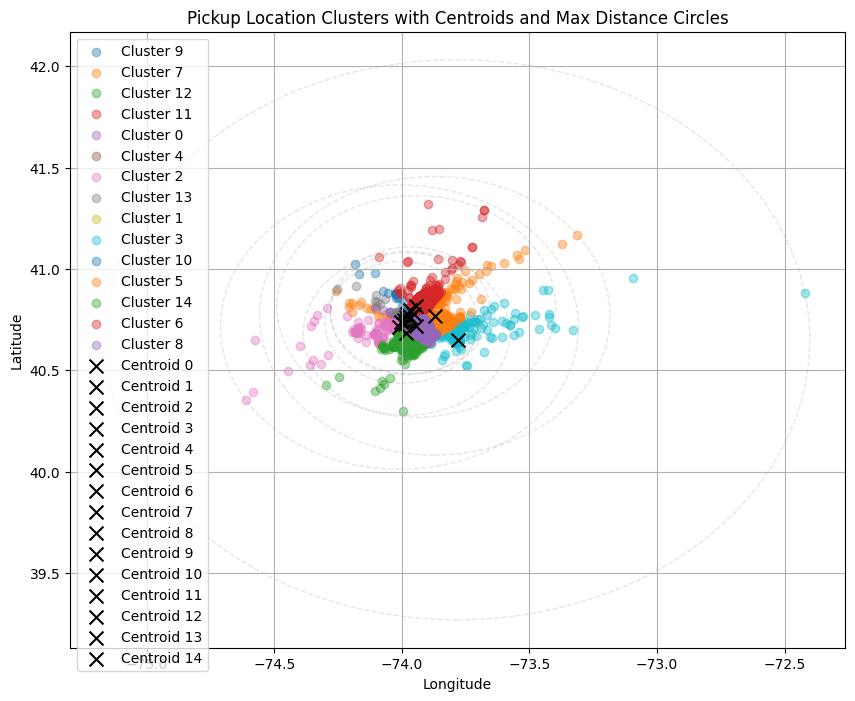

In [97]:
plt.figure(figsize=(10, 8))

# Plot points by cluster
for cluster_id in pickup_coords['cluster'].unique():
    cluster_data = pickup_coords[pickup_coords['cluster'] == cluster_id]
    plt.scatter(cluster_data['pickup_longitude'], cluster_data['pickup_latitude'], 
                label=f'Cluster {cluster_id}', alpha=0.4)

# Plot centroids
for i, (lat, lon) in enumerate(centroids):
    plt.scatter(lon, lat, c='black', marker='x', s=100, label=f'Centroid {i}')
    
    # Draw circle with max distance
    radius = max_distances[max_distances['cluster'] == i]['distance_to_centroid'].values[0]
    circle = plt.Circle((lon, lat), radius, color='gray', alpha=0.2, fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Location Clusters with Centroids and Max Distance Circles')
plt.legend()
plt.grid(True)
plt.show()


This scatter plot visualizes **pickup locations** grouped into **15 clusters** using a clustering algorithm (likely KMeans or similar):

- Each **colored dot** represents a pickup location.
- Black 'X' markers** indicate the **centroids** of each cluster.
- **Dashed concentric circles** represent the **maximum distance** from centroid to the farthest point within the cluster, offering insight into spatial dispersion.
- Latitude ranges from approximately 39.0 to 42.0, and longitude ranges from -75.0 to -72.5, indicating the geographical region (possibly NYC or nearby).

In [98]:
# Filter to NYC bounds to remove outliers (rough bounds for NYC)
pickup_coords_cleaned = pickup_coords[
    (pickup_coords['pickup_latitude'] >= 40.5) & (pickup_coords['pickup_latitude'] <= 40.95) &
    (pickup_coords['pickup_longitude'] >= -74.25) & (pickup_coords['pickup_longitude'] <= -73.7)
]


In [99]:
from sklearn.cluster import KMeans
import numpy as np

# Rerun clustering on cleaned data
coords = pickup_coords_cleaned[['pickup_latitude', 'pickup_longitude']]
kmeans = KMeans(n_clusters=15, random_state=42)
pickup_coords_cleaned['cluster'] = kmeans.fit_predict(coords)
centroids = kmeans.cluster_centers_

# Assign centroid positions to each row
pickup_coords_cleaned['centroid_lat'] = pickup_coords_cleaned['cluster'].map(lambda x: centroids[x][0])
pickup_coords_cleaned['centroid_lon'] = pickup_coords_cleaned['cluster'].map(lambda x: centroids[x][1])

# Distance from centroid
pickup_coords_cleaned['distance_to_centroid'] = np.sqrt(
    (pickup_coords_cleaned['pickup_latitude'] - pickup_coords_cleaned['centroid_lat'])**2 +
    (pickup_coords_cleaned['pickup_longitude'] - pickup_coords_cleaned['centroid_lon'])**2
)

# Max distance per cluster
max_distances = pickup_coords_cleaned.groupby('cluster')['distance_to_centroid'].max().reset_index()


C:\Users\venig\AppData\Local\Temp\ipykernel_30020\2389712583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_coords_cleaned['cluster'] = kmeans.fit_predict(coords)
C:\Users\venig\AppData\Local\Temp\ipykernel_30020\2389712583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_coords_cleaned['centroid_lat'] = pickup_coords_cleaned['cluster'].map(lambda x: centroids[x][0])
C:\Users\venig\AppData\Local\Temp\ipykernel_30020\2389712583.py:12: SettingWithCopyWarning: 
A value is trying to be se

C:\Users\venig\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


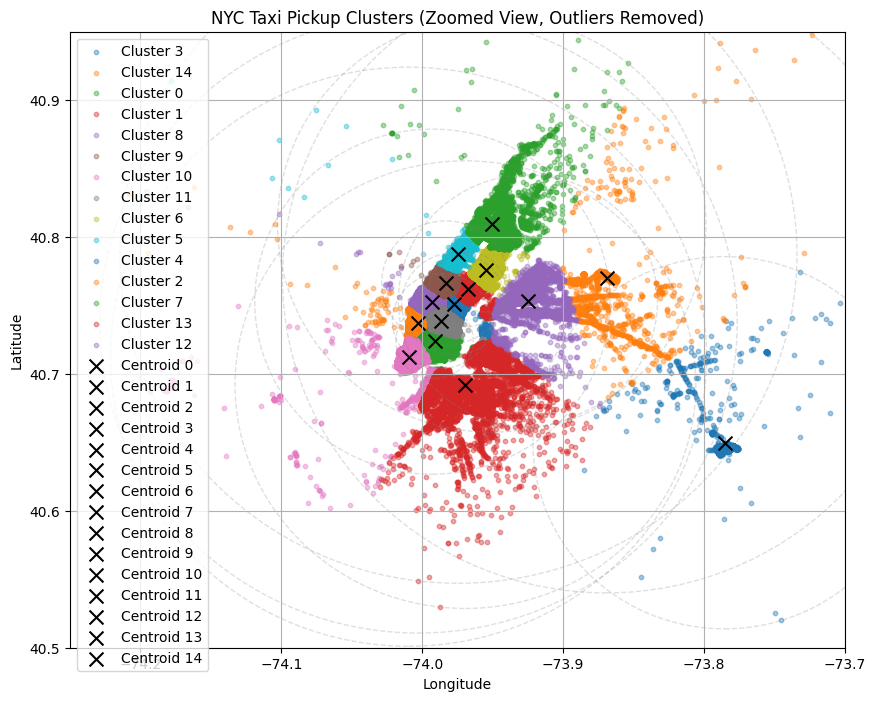

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot points by cluster
for cluster_id in pickup_coords_cleaned['cluster'].unique():
    cluster_data = pickup_coords_cleaned[pickup_coords_cleaned['cluster'] == cluster_id]
    plt.scatter(cluster_data['pickup_longitude'], cluster_data['pickup_latitude'], 
                label=f'Cluster {cluster_id}', alpha=0.4, s=10)

# Plot centroids and circles
for i, (lat, lon) in enumerate(centroids):
    plt.scatter(lon, lat, c='black', marker='x', s=100, label=f'Centroid {i}')
    
    # Add max radius circle for each cluster
    radius = max_distances[max_distances['cluster'] == i]['distance_to_centroid'].values[0]
    circle = plt.Circle((lon, lat), radius, color='gray', alpha=0.25, fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.xlim(-74.25, -73.7)   # Zoom to NYC longitude range
plt.ylim(40.5, 40.95)     # Zoom to NYC latitude range
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Taxi Pickup Clusters (Zoomed View, Outliers Removed)')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
# Count how many points belong to each cluster
cluster_counts = pickup_coords_cleaned['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'num_trips']
print(cluster_counts)


    cluster  num_trips
0         8      77581
1         6      75518
2         1      70861
3         9      69303
4         3      69135
5        11      66594
6        14      58359
7         0      54336
8         5      41752
9        10      35098
10        7      13800
11        2      11133
12       13      10758
13       12       5764
14        4       2678


In [102]:
centroids_df = pd.DataFrame(centroids, columns=['latitude', 'longitude'])
centroids_df['cluster'] = centroids_df.index
print(centroids_df)


     latitude  longitude  cluster
0   40.724109 -73.991263        0
1   40.761840 -73.967880        1
2   40.770045 -73.869244        2
3   40.751266 -73.977496        3
4   40.649759 -73.785516        4
5   40.787381 -73.974416        5
6   40.776278 -73.955079        6
7   40.809500 -73.950725        7
8   40.752800 -73.992871        8
9   40.766494 -73.983449        9
10  40.712598 -74.009761       10
11  40.738748 -73.986539       11
12  40.753380 -73.925040       12
13  40.692182 -73.969387       13
14  40.736934 -74.002760       14


- This code creates a new DataFrame called `centroids_df` to store the **latitude and longitude coordinates** of cluster centroids obtained from a clustering algorithm like **KMeans**.

In [103]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")
for i, row in centroids_df.iterrows():
    location = geolocator.reverse((row['latitude'], row['longitude']), exactly_one=True)
    print(f"Cluster {i}: {location.address}")

# The following code performs reverse geocoding using the geopy library. 
# The goal is to find a human-readable location name (like a neighborhood or borough) for each cluster's latitude and longitude centroid.

Cluster 0: 21, East 1st Street, Manhattan Community Board 3, Manhattan, New York County, City of New York, New York, 10003, United States
Cluster 1: East 59th Street & Lexington Avenue, East 59th Street, Manhattan Community Board 6, Manhattan, New York County, City of New York, New York, 10022, United States
Cluster 2: l, 100-33, Ditmars Boulevard, Queens, Queens County, City of New York, New York, 11369, United States
Cluster 3: 110, East 42nd Street, Midtown South, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10017, United States
Cluster 4: JFK Expressway, Queens, Queens County, City of New York, New York, 11430, United States
Cluster 5: 160, West 86th Street, Manhattan Community Board 7, Manhattan, New York County, City of New York, New York, 10024, United States
Cluster 6: 205, East 82nd Street, Carnegie Hill, Manhattan Community Board 8, Manhattan, New York County, City of New York, New York, 10028, United States
Cluster 7: 268, West 125th S

In [104]:
widest_cluster = max_distances.sort_values('distance_to_centroid', ascending=False).head(1)
print(widest_cluster)

   cluster  distance_to_centroid
5        5               0.24031


In [105]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
import pandas as pd

# STEP 1: Prepare coordinates
pickup_coords = nyc_df[['pickup_latitude', 'pickup_longitude']].dropna().round(4)
dropoff_coords = nyc_df[['dropoff_latitude', 'dropoff_longitude']].dropna().round(4)

# STEP 2: Assign pickup clusters using trained centroids
pickup_cluster_labels, _ = pairwise_distances_argmin_min(pickup_coords, centroids)

# STEP 3: Assign dropoff clusters
dropoff_cluster_labels, _ = pairwise_distances_argmin_min(dropoff_coords, centroids)

# STEP 4: Count pickup cluster frequencies
pickup_counts = pd.Series(pickup_cluster_labels).value_counts().reset_index()
pickup_counts.columns = ['pickup_cluster', 'num_pickups']
pickup_counts.sort_values(by='num_pickups', ascending=False, inplace=True)

# STEP 5: Count dropoff cluster frequencies
dropoff_counts = pd.Series(dropoff_cluster_labels).value_counts().reset_index()
dropoff_counts.columns = ['dropoff_cluster', 'num_dropoffs']
dropoff_counts.sort_values(by='num_dropoffs', ascending=False, inplace=True)

# STEP 6: Print Top Results
print("🚕 Top Pickup Clusters:")
print(pickup_counts.head(10))

print("\n📍 Top Dropoff Clusters:")
print(dropoff_counts.head(10))


🚕 Top Pickup Clusters:
   pickup_cluster  num_pickups
0               8        77581
1               6        75518
2               1        70861
3               9        69303
4               3        69135
5              11        66594
6              14        58362
7               0        54336
8               5        41754
9              10        35112

📍 Top Dropoff Clusters:
   dropoff_cluster  num_dropoffs
0                6         78030
1                3         71436
2                8         69583
3                1         64860
4                9         64582
5               11         59568
6               14         50792
7                0         49204
8                5         41475
9               10         37164


In [106]:
nyc_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,...,dropoff_hour,trip_distance_km,trip_type,trip_duration_min,trip_speed_kmph,pickup_area,pickup_lat_rounded,pickup_lon_rounded,dropoff_lat_rounded,dropoff_lon_rounded
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016-02-29,...,16,1.199073,Short,6.666667,10.791654,"40.78,-73.95",40.779,-73.954,40.8,-74.0
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016-03-11,...,23,4.129111,Medium,18.333333,13.513454,"40.73,-73.99",40.732,-73.988,40.7,-74.0
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016-02-21,...,18,7.250753,Long,27.250000,15.964960,"40.72,-74.0",40.721,-73.997,40.8,-73.9
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016-01-05,...,10,2.361097,Medium,19.016667,7.449562,"40.76,-73.96",40.760,-73.962,40.8,-74.0
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016-02-17,...,6,4.328534,Medium,14.133333,18.375851,"40.71,-74.02",40.708,-74.017,40.7,-74.0


In [107]:
import plotly.express as px

# Round coordinates and calculate top 20 pickup locations
top_pickups = (
    nyc_df.assign(
        pickup_latitude=nyc_df['pickup_latitude'].round(3),
        pickup_longitude=nyc_df['pickup_longitude'].round(3)
    )
    .groupby(['pickup_latitude', 'pickup_longitude'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(20)
)

# Plot using Plotly Mapbox
fig = px.scatter_mapbox(
    top_pickups,
    lat='pickup_latitude',
    lon='pickup_longitude',
    size='count',
    size_max=10,
    hover_name='count',
    zoom=9,
    mapbox_style='open-street-map',
    title='Top 20 Most Frequent Pickup Locations'
)

fig.show()


C:\Users\venig\AppData\Local\Temp\ipykernel_30020\3351748133.py:17: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


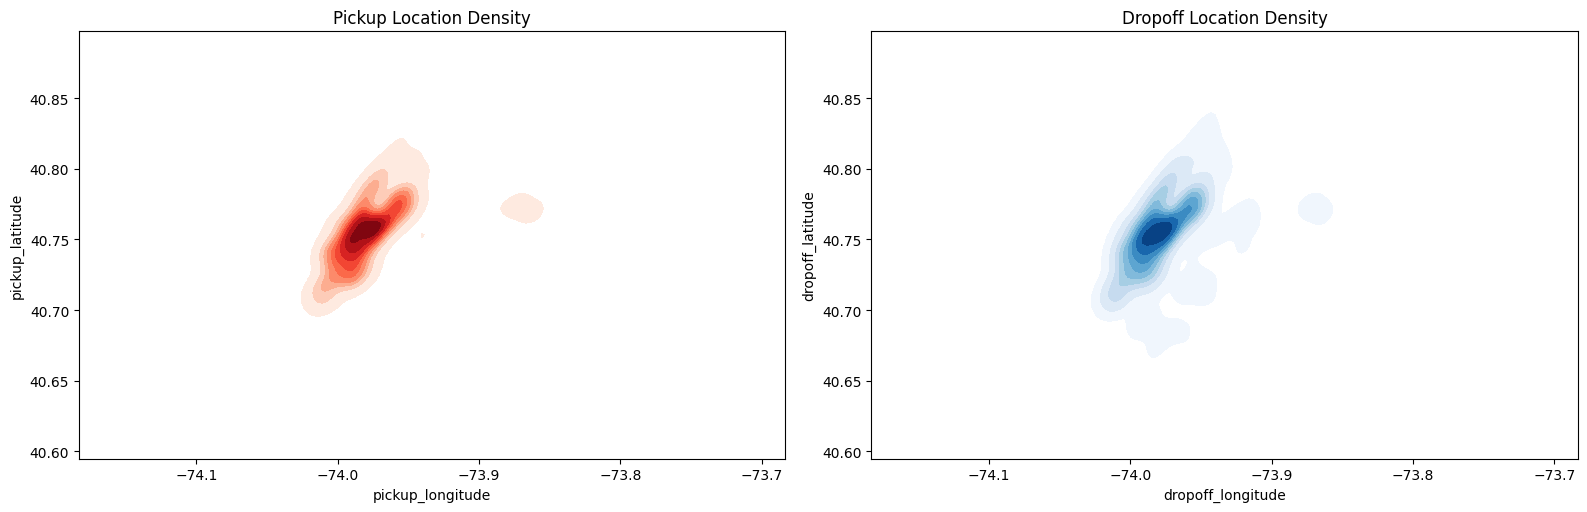

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample the dataset to speed up plotting
sample_size = 10000
nyc_sample = nyc_df.sample(n=min(sample_size, len(nyc_df)), random_state=42)

# Create side-by-side KDE plots for pickup and dropoff locations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Determine common limits for better visual comparison
x_min = min(nyc_sample['pickup_longitude'].min(), nyc_sample['dropoff_longitude'].min())
x_max = max(nyc_sample['pickup_longitude'].max(), nyc_sample['dropoff_longitude'].max())
y_min = min(nyc_sample['pickup_latitude'].min(), nyc_sample['dropoff_latitude'].min())
y_max = max(nyc_sample['pickup_latitude'].max(), nyc_sample['dropoff_latitude'].max())

# Pickup KDE
sns.kdeplot(
    x='pickup_longitude', y='pickup_latitude',
    data=nyc_sample, fill=True, cmap='Reds', ax=ax1
)
ax1.set_title('Pickup Location Density')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_aspect('equal')

# Dropoff KDE
sns.kdeplot(
    x='dropoff_longitude', y='dropoff_latitude',
    data=nyc_sample, fill=True, cmap='Blues', ax=ax2
)
ax2.set_title('Dropoff Location Density')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()



In [109]:
# Assign pickup and dropoff cluster labels back to the main dataframe (use index alignment)
nyc_df = nyc_df.copy()
nyc_df.loc[pickup_coords.index, 'pickup_cluster'] = pickup_cluster_labels
nyc_df.loc[dropoff_coords.index, 'dropoff_cluster'] = dropoff_cluster_labels


In [110]:
# Convert cluster labels to integers (if needed)
nyc_df['pickup_cluster'] = nyc_df['pickup_cluster'].astype(int)
nyc_df['pickup_cluster'] = nyc_df['dropoff_cluster'].astype(int)

# Filter trips with valid clusters
valid_cluster_trips = nyc_df.dropna(subset=['pickup_cluster', 'dropoff_cluster', 'trip_distance_km'])

# Calculate average distance between each pickup and dropoff cluster pair
avg_distance_between_clusters = (
    valid_cluster_trips
    .groupby(['pickup_cluster', 'dropoff_cluster'])['trip_distance_km']
    .mean()
    .reset_index(name='avg_trip_distance_km')
    .sort_values(by='avg_trip_distance_km', ascending=False)
)


In [111]:
# Ensure pickup and dropoff clusters are integers
nyc_df['pickup_cluster'] = nyc_df['pickup_cluster'].astype(int)
nyc_df['dropoff_cluster'] = nyc_df['dropoff_cluster'].astype(int)

# Drop rows where cluster labels are missing
valid_cluster_trips = nyc_df.dropna(subset=['pickup_cluster', 'dropoff_cluster'])

# Count number of trips for each cluster-to-cluster pair
trip_counts_between_clusters = (
    valid_cluster_trips
    .groupby(['pickup_cluster', 'dropoff_cluster'])
    .size()
    .reset_index(name='num_trips')
    .sort_values(by='num_trips', ascending=False)
)

# View the top 20 busiest cluster pairs
print(trip_counts_between_clusters.head(40))



    pickup_cluster  dropoff_cluster  num_trips
6                6                6      78030
3                3                3      71436
8                8                8      69583
1                1                1      64860
9                9                9      64582
11              11               11      59568
14              14               14      50792
0                0                0      49204
5                5                5      41475
10              10               10      37164
7                7                7      26475
13              13               13      25219
12              12               12      12431
2                2                2       9901
4                4                4       2045


- **Cluster 6** has the highest volume of intra-cluster trips with over **78,000 trips**, indicating a highly active local region.
- The top 5 clusters each have **60k+ trips**, showing strong local commute patterns.
- Lower-ranked clusters like **Cluster 2** and **Cluster 4** may represent low-activity zones or less frequently traveled areas.
- Since all pickup and dropoff clusters are the same, these trips are likely **short-distance**, possibly intra-neighborhood travel.

### Time series insights

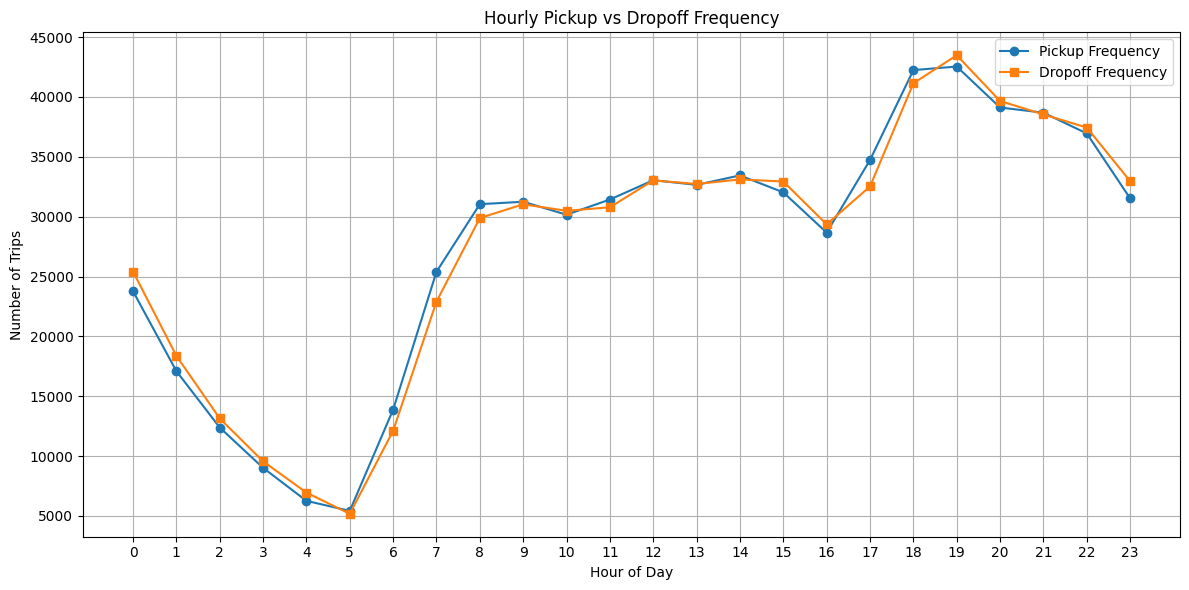

In [112]:
import matplotlib.pyplot as plt

# Get hourly counts
pickup_counts = nyc_df['pickup_hour'].value_counts().sort_index()
dropoff_counts = nyc_df['dropoff_hour'].value_counts().sort_index()

# Plot as line chart
plt.figure(figsize=(12, 6))

plt.plot(pickup_counts.index, pickup_counts.values, label='Pickup Frequency', marker='o')
plt.plot(dropoff_counts.index, dropoff_counts.values, label='Dropoff Frequency', marker='s')

# Plot settings
plt.title('Hourly Pickup vs Dropoff Frequency')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))  # Show all 24 hours
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


We can clearly mark that the taxi are busiest during the time of 6-10 indicating more workflow and dip at evening 4pm and a rapid rise during the evening 5pm -7pm indicating may be the return hours of people 
- `6-10` & `5pm-8pm` : Busy
- `12am - 5am` : Very less trips 

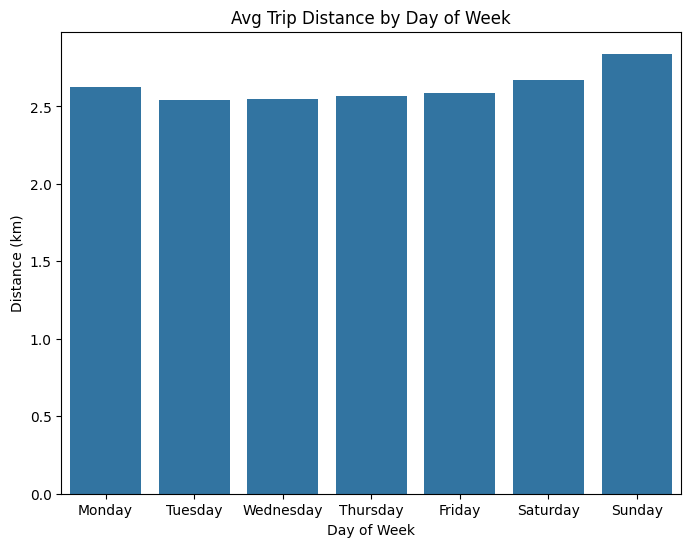

In [113]:
avg_dist = nyc_df.groupby('day_of_week')['trip_distance_km'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='day_of_week', y='trip_distance_km', data=avg_dist, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Avg Trip Distance by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Distance (km)")
plt.show()

#This cell demonstrates the avg distance travelled oneach and 
# Every day of week informing us that sunday has the higher distance travelled on an average.

In [114]:
nyc_df['month'].value_counts().sort_index()
#This depeicts the number of trips planned monthly by the vendors april,may having the highest trips planned in new york.


month
April       114368
February    109804
January     104553
June        105366
March       117251
May         111423
Name: count, dtype: int64

C:\Users\venig\AppData\Local\Temp\ipykernel_30020\4147389688.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




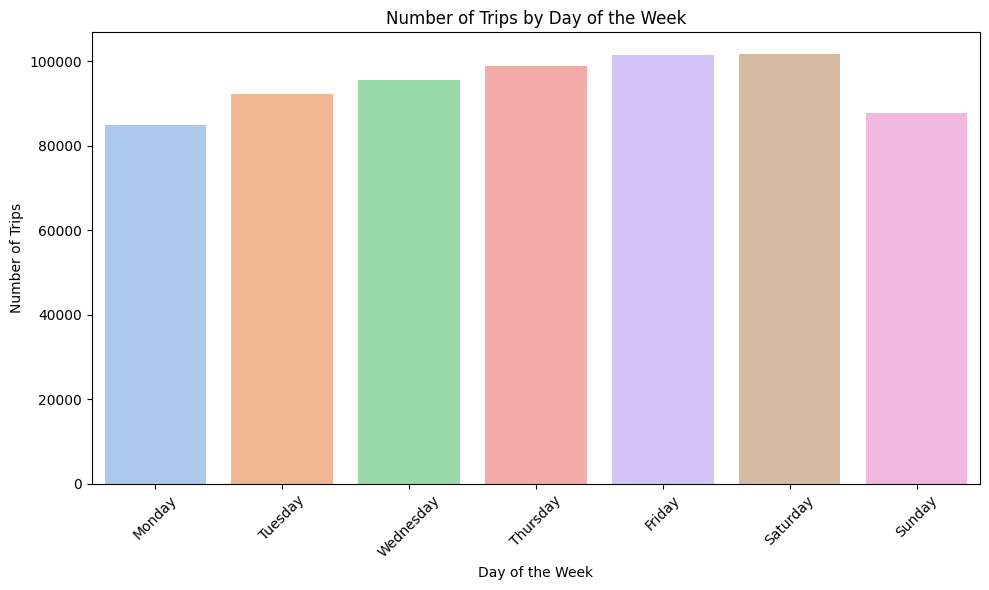

In [115]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count number of trips per day of week
trips_by_day = nyc_df['day_of_week'].value_counts().reindex(weekday_order)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_by_day.index, y=trips_by_day.values, palette='pastel')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# This cell represents the trips count on each week day representing
# saturday with the highest numbe rof trips and 
# sunday with lowest number of trips but with higher avg km travelled on sunday
# this might suggest long distance travelling trips occur during the sunday.

In [116]:
nyc_df['day'] = nyc_df['pickup_date'].dt.day


In [117]:
day_month_counts = nyc_df.groupby(['month', 'day']).size().reset_index(name='trip_count')


In [118]:
day_month_counts.head()

,month,day,trip_count
0,April,1,3944
1,April,2,4271
2,April,3,3601
3,April,4,3624
4,April,5,3794


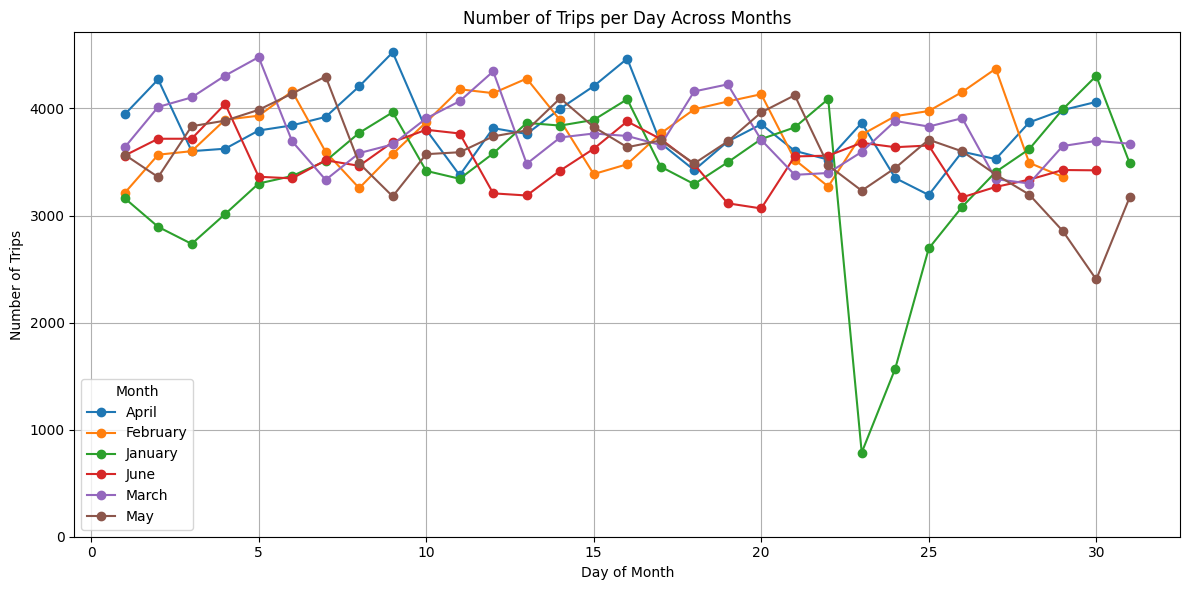

In [119]:
import matplotlib.pyplot as plt

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
day_month_counts['month'] = pd.Categorical(day_month_counts['month'], categories=month_order, ordered=True)

pivot_table = day_month_counts.pivot(index='day', columns='month', values='trip_count')

pivot_table.plot(figsize=(12, 6), marker='o')
plt.title('Number of Trips per Day Across Months')
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.legend(title='Month')
plt.tight_layout()
plt.ylim(bottom=0)
plt.show()


The line graph above shows the **daily number of trips** across six different months: January, February, March, April, May, and June. Each line represents one month, and the x-axis denotes the **day of the month**, while the y-axis indicates the **number of trips** on that day.

 Key Observations:
- Consistent Range: Most months maintain a relatively steady number of trips between **3,000 and 4,500** trips per day.
- **Sudden Drops**:
  - January experiences a sharp drop on day 23.
  - February, May, and June show a complete drop to zero at the end of the month. This is due to there is no 31 day in those months
- March and April show relatively stable trends with no major dips.
- Highest Activity: April and March often report some of the highest daily trip counts, peaking above 4,500 on certain days.

Conclusion:
The data reveals overall stability in daily trip volume with some exceptional drops that warrant further data quality checks or analysis into external factors (e.g., holidays, technical issues, or incomplete logs).

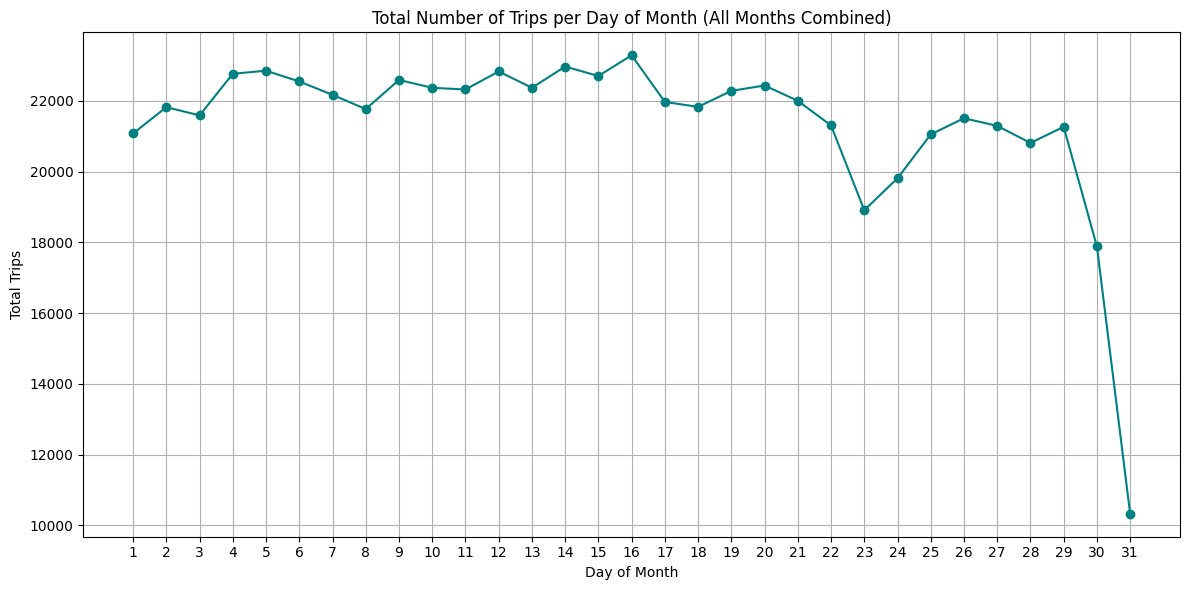

In [120]:
daily_trip_total = nyc_df.groupby('day').size().reset_index(name='total_trips')
daily_trip_total = daily_trip_total.sort_values('day')

# Step 4: Plot a single line
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_trip_total['day'], daily_trip_total['total_trips'], marker='o', color='teal')
plt.title('Total Number of Trips per Day of Month (All Months Combined)')
plt.xlabel('Day of Month')
plt.ylabel('Total Trips')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()

The graph clearly indicates the trip count on a particular day for all the 6 months summation indication almost same number of trips in all days except on 30,31 this is likely due to feb has only 28 days where as april and june has 30 days so the count is low on 31st point.

### Business Insights

-  The majority of trips are short-distance rides under `2 km and 10 minutes`. Vendors can increase revenue and reduce idle time by focusing more vehicles in these high-demand areas, such as Midtown and Downtown Manhattan, particularly during peak periods. Compact cars can be prioritized to meet this demand efficiently.

-  particularly clusters 1, 5, 4, and 6 — each recording over 70,000 trips. These areas likely correspond to high-traffic regions such as Midtown and Downtown Manhattan. Additionally, most trips within these clusters are short-distance (under 2 km) and quick (less than 10 minutes).

-  Most pickups and drop-offs are concentrated in a specific geographic cluster—likely(1,5,4,6) a metropolitan zone.
-  Business Impact: Target marketing and fleet availability in this central area to meet demand efficiently.

-  Trips spike significantly during rush hours (7–10 AM and 4–7 PM). Vendors can use this insight to schedule driver shifts to match these demand patterns, ensuring better driver availability, reducing customer wait times, and increasing completed trips per driver.

-  Some rides were recorded at speeds exceeding 200 km/h — physically impossible within NYC. These likely stem from GPS errors or data issues. Vendors can implement data validation logic to filter such anomalies, ensuring fare calculations remain accurate and trustworthy. And we also have seen many vehicles dont have `store_and_fwd_flag` this feature this misght be the possible reason as vehicles are not connected to the server resulting in false speed recordings.

-  Most trips involve 1–2 passengers, with large groups being rare. Vendors can optimize their fleet by assigning smaller vehicles for regular city trips and larger ones for airport or group transport, reducing operational costs and improving fleet utilization.



-  Some trips have 0 passengers, which is illogical. These may be cancellation cases or system errors—an opportunity to enhance booking validation. so we should concentrate on increasing server connection `store_and_fwd_flag` for better data gathering.

-  The pickup and drop-off clustering may indicate frequently traveled routes. Introducing offers for regular customers in those cluster could improve the business of the vendors